### Strand Classifier Using one Minhash Function
* A single threaded implementation of Strand as a SciKit Estimator using **only one** hashing function. 

**Training Data File:**
* File Name: RDP_All_Clean.strand
* Total classes: 64
* Longest sequence in file: 1,834  
* File Sequence Count: 4,786
* Input file size of 14,365 KB

**Hyperparameter Tuning:**
* GridSearchCV using Stratified 10-fold CV and 350 fits per model.
* Kmer lengths: 10, 15, 20, 40, 60, 70, 80.
* Minhash lengths: 100, 250, 500, 1000, 1500.
* All 35 average accuracy scores are plotted at each kmer / minhash length intersection.  
* Time: 9min 16s 
* Best Parms: kmer_length=20, minhash_length=1000
* Accuracy: 99.62%

**Inspection of Stratified 10-fold cv Predictions**:
* Correct Predictions:   4739
 * Out of a 1000 value minhash signature, on average, 789.54 are found in the training dataset (79.85%)  
* Incorrect Predictions: 47
 * Out of a 1000 value minhash signature, on average, 558.45 are found in the training dataset (55.84%)

**Inspection of training data:**
* There are 64 classes in the training dataset. 
* There are 127,506 minhash values in the training dataset.
* There are 174,650 categories associated to minhashes in the training dataset.
* Each minhash has, on average, 1.39 associated categories.  
* 111,476 minhashes have only 1 category associated, 8,625 have 2 categories associated, 4,405 have 3 or more.
* Categories range from having 1,149 minhashes to 11,122 minhashes associated.   

**Test - Penalize minhashes with multiple category associations:**
* Each minhash category association is worth 1 point 
* When the minhash is associated with more than 1 category, 
* During predictions, divide that 1 point equally across each associated category
* 10-fold stratified cv @ 90 / 10 splits and (kmer_length=15, minhash_length=500) = 9min 9s, 99.60% Accuracy

**Test - Penalize unbalanced categories:**
* Each minhash category association is no longer worth 1 point
* Each minhash category association is worth 1 - (Cat Count / Sum(All Category Counts))
* Unbalanced categories are penalized the larger they become based on the percentage of all
* 10-fold stratified cv @ 90 / 10 splits and (kmer_length=20, minhash_length=500) = 9min 34s, 99.64% Accuracy

**Test - Penalize unbalanced categories and multiple category associations:**

* Unbalanced Categories
 * Each minhash category association is no longer worth 1 point
 * Each minhash category association is worth 1 - (Cat Count / Sum(All Category Counts))
 * Unbalanced categories are penalized the larger they become based on the percentage of all 

* Multiple Category Associations
 * When the minhash is associated with more than 1 category, 
 * During predictions, divide the category's point value equally across each associated category

* 10-fold stratified cv @ 90 / 10 splits and (kmer_length=10, minhash_length=1000) = 9min 51s, 99.60% Accuracy

**Test - Oversample predictions, Penalize unbalanced categories and multiple category associations**

* Score all minhash values during a prediction
 * Modified create_minhash_signature() to include a specified length
 * During .predict() score all kmers from the minhash signature against each category. 

* Unbalanced Categories
 * Each minhash category association is no longer worth 1 point
 * Each minhash category association is worth 1 - (Cat Count / Sum(All Category Counts))
 * Unbalanced categories are penalized the larger they become based on the percentage of all 

* Multiple Category Associations
 * When the minhash is associated with more than 1 category, 
 * During predictions, divide the category's point value equally across each associated category
 
* 10-fold stratified cv @ 90 / 10 splits and (kmer_length=15, minhash_length=1500) = 10min 31s, 99.58% Accuracy

**Test - Oversample predictions, No Category Penalties**

*Score all minhash values during a prediction
 * Modified create_minhash_signature() to include a specified length
 * During .predict() score all kmers from the minhash signature against each category.

* 10-fold stratified cv @ 90 / 10 splits and (kmer_length=20, minhash_length=1500) = 9min 5s, 99.6% Accuracy

**Test - Category based Inverse Document Frequency**
* Categories are documents 
 * IDf = log(C / c) where C = Total # of categories and c = total categrories for a given minhash 

* 10-fold stratified cv @ 90 / 10 splits and (kmer_length=70, minhash_length=100) = 13min 40s, 99.47% Accuracy

**Test - Category size adjusted kmers * Category based Inverse Document Frequency**
* IFD
 * Categories are documents 
 * IDf = log(C / c) where C = Total # of categories and c = total categories for a given minhash 
* Category size adjusted kmers
 * Like Term Frequency adjusted for document length (TF / terms in document)
 * All minhash frequencies == 1
 * So Category frequency adjusted for Category length:
 * 1 / Category Total frequency 
* Finally ACF-CIDF:
 * ACF-CIDF = acf * cidf
 * ACF = 1 / Category Total frequency 
 * CIDF = log(Total # of Categories / total categories for a given minhash word)

* 10-fold stratified cv @ 90 / 10 splits and (kmer_length=80, minhash_length=1500) = 14min 17s, 86.48% Accuracy

**Test - Unbalanced Categories (ACF take 2) * Category based Inverse Document Frequency**
* IFD
 * Categories are documents 
 * IDf = log(C / c) where C = Total # of categories and c = total categories for a given minhash 

* Unbalanced Categories (ACF take 2)
 * Each minhash category association is no longer worth 1 point
 * Each minhash category association is worth 1 - (Cat Count / Sum(All Category Counts))
 * Unbalanced categories are penalized the larger they become based on the percentage of all 
 * ACF = 1 - (Cat Count / Sum(All Category Counts))

* Finally ACF-CIDF:
 * ACF-CIDF = acf * cidf
 * ACF = 1 - (Cat Count / Sum(All Category Counts)) 
 * CIDF = log(Total # of Categories / total categories for a given minhash word)
 
* 10-fold stratified cv @ 90 / 10 splits and (kmer_length=80, minhash_length=100) = 15min 2s, 99.45% Accuracy

# Baseline Tests using all Kmers
* The following tests act as an RDP File baseline and use all kmers during .fit() and .predict()
* Baseline tests are not possbile for larger sequence files
# ------------------------------------------------------------------------------------ 

**Test - Train and Predict using all kmers** 
* The minhash_length parameter is ignored in this test!!!
* This should give the highest possbile Jaccard similarity you can achieve on this file 
* The minhash signature uses all kmers in the sequence.
* I still hash the kmers to save space. 
* This test is only possible on smaller files and will run out of memory quickly. 

* 10-fold stratified cv @ 90 / 10 splits and (kmer_length=20) = 4min 20s, 99.60% Accuracy
 * 'kmer_length': 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80 - 110 fits

**Test - Train and Predict using all kmers, Penalize unbalanced categories and multiple category associations**
* The minhash_length parameter is ignored in this test!!!
* This should give the highest possbile Jaccard similarity you can achieve on this file 
* The minhash signature uses all kmers in the sequence.
* I still hash the kmers to save space. 
* This test is only possible on smaller files and will run out of memory quickly.

* Unbalanced Categories
 * Each minhash category association is no longer worth 1 point
 * Each minhash category association is worth 1 - (Cat Count / Sum(All Category Counts))
 * Unbalanced categories are penalized the larger they become based on the percentage of all 

* Multiple Category Associations
 * When the minhash is associated with more than 1 category, 
 * During predictions, divide the category's point value equally across each associated category

* 10-fold stratified cv @ 90 / 10 splits and (kmer_length=15) = 5min 5s, 99.58% Accuracy
 * 'kmer_length': 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80 - 110 fits
 
**Test - Train and Predict using all kmers, Calculate Jaccard similarity between each kmer set and category**
* The minhash_length parameter is ignored in this test!!!
* This should give the highest possbile Jaccard similarity you can achieve on this file 
* The minhash signature uses all kmers in the sequence.
* I still hash the kmers to save space. 
* This test is only possible on smaller files and will run out of memory quickly.

**Calculate Jaccard similarity between each kmer set and category**
* insection(kmers, category kmers) / union(kmers, category kmers)

* 10-fold stratified cv @ 90 / 10 splits and (kmer_length=80) = 5min 3s, 93.9% Accuracy
 * 'kmer_length': 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80 - 110 fits

## Code to plot all grid search results 

In [6]:
# This magic just sets up matplotlib's interactive mode
%matplotlib inline
# So you have to explicitely import the module into the namespace
import matplotlib.pyplot as plt

In [7]:
# ************* WARNING - You must inspect the cv_results_ to determine which parameter is not repeately duplicated 
#                         row after row in cv_results_['params'].  This should be grid_param_1.
#                         In short, if the plot's data is not right, reverse grid_param_1 and grid_param_2.  
# https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    plt.rcParams["figure.figsize"] = (14,10)
    
    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=10)
    ax.grid(True)

## Load the RDP Dataset

In [8]:
def read_fasta_file(file_path):
    X = []
    y = []
    with open(file_path, 'r') as dat:
        for line in dat.readlines():
            #print(line)
            if line[0] == '>':
                g_start = line.find("g__")
                g_end = line.find(";", g_start)
                genus = line[g_start:g_end]
                y.append(genus)
            else:
                X.append(line)
    return X, y

In [9]:
import pandas as pd

# Read in the fasta file
X, y = read_fasta_file('D:/StrandPy/Data/RDP_All_Clean.strand')
#Remove low count genera that halt cross validation
data = {'X': X,'y':y}
df = pd.DataFrame(data)

In [10]:
#Inspect counts for each class
vcts = df.y.value_counts()
low_vcts = vcts[vcts < 20].index.values

#Remove low count genera. Any classes < the fold count will halt cross validation
df = df[~df.y.isin(low_vcts)]

# Create X and y
X = df.X.values
y = df.y.values

print('File Size: ' + str(len(X)))

File Size: 4786


In [11]:
print('Longest Sequence Chars:' + str(len(max(X, key=len))))

Longest Sequence Chars:1834


## Inspect the categories we are trying to classify

In [7]:
pd.set_option('display.max_rows', 100)
df.y.value_counts()

g__Streptomycineae                     544
g__Micrococcineae                      488
g__Corynebacterineae                   401
g__Pseudonocardineae                   192
g__Streptosporangineae                 188
g__Bacillus                            177
g__Lactobacillus                       159
g__Pseudomonas                         136
g__Clostridium_sensu_stricto           130
g__Micromonosporineae                  129
g__Paenibacillus                       126
g__Propionibacterineae                 125
g__Mycoplasma                          114
g__Shewanella                           84
g__Vibrio                               77
g__Streptococcus                        76
g__Halomonas                            64
g__Flavobacterium                       63
g__Staphylococcus                       62
g__Burkholderia                         58
g__Sphingomonas                         57
g__Desulfovibrio                        55
g__Chryseobacterium                     54
g__Actinomy

## Hypertune kmer_length and minhash_length parameters

In [185]:
import numpy as np
from sys import maxsize
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted, check_random_state
from sklearn.utils.multiclass import unique_labels

class StrandClassifierV2(BaseEstimator, ClassifierMixin):
    """
    Parameters
    ----------
    X_ : ndarray, shape (n_samples, n_features)
         The input passed during :meth:`fit`.
    y_ : ndarray, shape (n_samples,)
         The labels passed during :meth:`fit`.
    classes_ : ndarray, shape (n_classes,)
              The classes seen at :meth:`fit`.
    kmer_length : integer, breaking the gene sequence into chunks of this length  
    minhash_length: integer, the number of minhash values to be included in the minhash signature. 
                    Longer minhash signatures approximate Jaccard Similarity more accurately and take 
                    more time to create. The total number of randomly seeded hashing functions is 
                    also controlled by the value in minhash_length.
    minhash_store_ : dict() array, shape (minhash_length), key == minhash int, value = category array int
                      Partitions unique minhash values and category associations by hash function.
    """
    def __init__(self, kmer_length=20, minhash_length=100, random_state=None):
        self.kmer_length = kmer_length
        self.random_state = random_state
        self.minhash_length = minhash_length
        
    def fit(self, X, y):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The training input samples.
        y : array-like, shape (n_samples,)
            The target values. An array of int.
        Returns
        -------
        self : object
            Returns self.
        """
        self.random_state_ = check_random_state(self.random_state)
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y, ensure_2d=False, dtype=None)
        
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        
        # Store the training data (X) and targets (y) used to fit the model
        self.X_ = X
        self.y_ = y
        
        # Store the minhash values and respective categories
        self.minhash_store_ = dict()
        
        # Train the model for X and y
        for sequence, category in zip(X, y):   
            # Create minhash signatures for each sequence
            signature = self.create_minhash_signature(sequence)
            # Store minhash values and respective categories to minhash_store_ partitioned by hash function 
            self.add_signature_to_minhash_store(category, signature)
            
        # Return the classifier
        return self

    def predict(self, X):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        y : ndarray, shape (n_samples,)
            The label for each sample is the label of the closest sample
            seen during fit.
        """
        # Check is fit had been called
        check_is_fitted(self, ['X_', 'y_'])

        # Input validation
        X = check_array(X, ensure_2d=False, dtype=None)
        
        yhats = []
        self.winning_scores_ = []
        self.scores_sums_ = []
        
        for sequence in X:
            # Create a minhash signature from the sequence X
            signature = self.create_minhash_signature(sequence)
            # Score all categories using the minhash signature  
            category_scores = self.get_category_scores(signature)
            #Get the first category with the highest score
            winning_category = max(category_scores, key=category_scores.get)
            #Add to our predictions
            yhats.append(winning_category)
            #get the the number of votes for the winning category
            self.winning_scores_.append(max(category_scores.values()))
            #get the the number of votes for the winning category
            self.scores_sums_.append(sum(category_scores.values()))
            
        
        return yhats
    
    def kmer_generator(self, sequence='', kmer_length=0):
        kmer_count = len(sequence) - (kmer_length - 1)
        for i in range(0, kmer_count):
            yield sequence[i:i + kmer_length]
    
    def create_minhash_signature(self, sequence):
        """
        Parameters
        ----------
        sequence : string, A gene sequence or other string data to be broken into kmers.
        ----------
        signature : array of int, shape (minhash_length), minimum hash value produced by each hash function
                    after hashing all kmers generated from sequence.
        """
        #Break sequence into hashed kmers, then sort
        kmer_hashes = [hash(kmer) for kmer in self.kmer_generator(sequence,self.kmer_length)]
        kmer_hashes.sort()
        #Take the first minhash_length hashes to create the signature 
        signature = kmer_hashes[:self.minhash_length]
        return signature
    
    def add_signature_to_minhash_store(self, category, minhash_signature):
        '''
        Parameters
        ----------
        category : int or string, the category value associated with this minhash_signature
        minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence. 
        '''
        # Add each minhash value and category to the minhash store
        for minhash_value in minhash_signature:
            # Do we already have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories == None:
                # No, so create a new category set for this minhash value
                self.minhash_store_[minhash_value] = {category}
            else: 
                #Yes, add the category to the minhash value's category set
                minhash_categories.add(category)
        return 
    
    '''
    Parameters
    ----------
    minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence.
    Returns
    ----------
    class_scores : dict, shape (minhash_length), key = category, value = category score int
                   The count of categories associated with each hash function's minhash value. 
    '''
    def get_category_scores(self, minhash_signature):
        # Create a dictionary of category / class scores
        class_scores = dict.fromkeys(self.classes_ , 0)
        # lookup minhash values in minhash stores 
        for minhash_value in minhash_signature:
            # Do we have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories != None:
                # Yes, add 1 for each category in the set  
                for category in minhash_categories:
                    class_scores[category] += 1
        return class_scores

In [110]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# create cross validation iterator
cv = StratifiedKFold(n_splits=10, random_state=42)

strand = StrandClassifierV2(random_state=42)

parameters = { 'kmer_length':[10,15,20,40,60,70,80]
              ,'minhash_length': [100,250,500,1000,1500]
             }

grid_search = GridSearchCV(estimator=strand
                   , n_jobs=-1 # jobs to run in parallel
                   , verbose=1 # low verbosity in output messages
                   , param_grid=parameters
                   , cv=cv
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
grid_search.fit(X, y)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  9.2min finished


Wall time: 9min 16s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=StrandClassifierV2(kmer_length=20, minhash_length=100,
                                          random_state=42),
             iid='warn', n_jobs=-1,
             param_grid={'kmer_length': [10, 15, 20, 40, 60, 70, 80],
                         'minhash_length': [100, 250, 500, 1000, 1500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [111]:
grid_search.best_estimator_

StrandClassifierV2(kmer_length=20, minhash_length=1000, random_state=42)

In [112]:
print('Highest CV Mean Accuracy')
max(grid_search.cv_results_['mean_test_score'])

Highest CV Mean Accuracy


0.9962390305056414

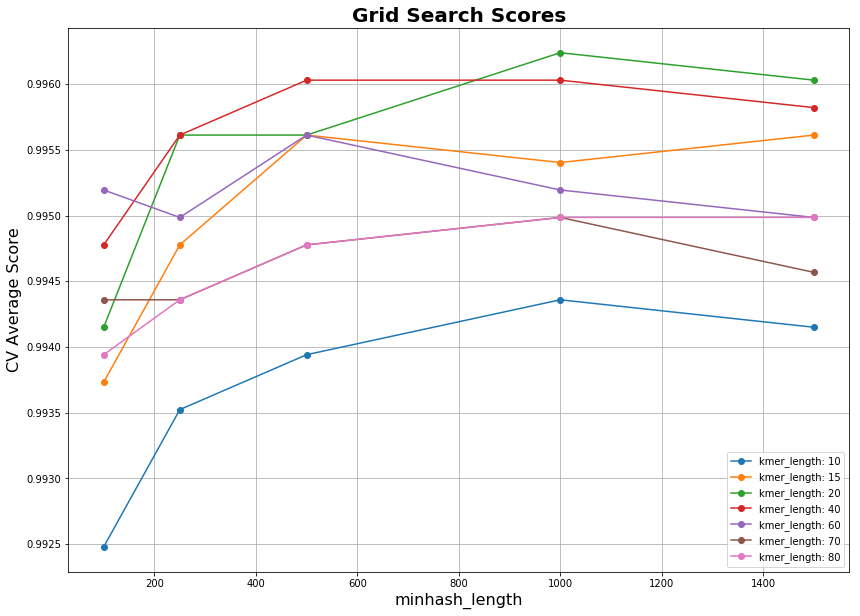

In [115]:
plot_grid_search(grid_search.cv_results_, parameters['minhash_length'], 
                 parameters['kmer_length'], 'minhash_length','kmer_length')

## How many minhash values get a hit in our training dictionary? 

In [191]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# create cross validation iterator
cv = StratifiedKFold(n_splits=10, random_state=42)

yhats = np.zeros(len(y), dtype=np.object)
winning_scores = np.zeros(len(y))
scores_sums = np.zeros(len(y))

#Perform 10 fold cv, saving all predictions 
for test, train in cv.split(X,y):
    # Train and test on the one fold
    strand = StrandClassifierV2(kmer_length=20, minhash_length=1000, random_state=42)
    strand.fit(X[train],y[train])
    yhats[test] = strand.predict(X[test])
    winning_scores[test] = strand.winning_scores_
    scores_sums[test] = strand.scores_sums_

Wall time: 4min 8s


In [192]:
#Load results into a dataframe for analisys
data = {'y':y,'yhat':yhats,'winning_score':winning_scores,'scores_sum': scores_sums}
df = pd.DataFrame(data)

In [193]:
correct_yhats = df[df.y == df.yhat]
print(len(correct_yhats))
incorrect_yhats = df[df.y != df.yhat]
print(len(incorrect_yhats))

4746
40


### Hits on correct predictions

In [194]:
correct_yhats.mean(axis = 0)

winning_score     789.544248
scores_sum       8302.183312
dtype: float64

In [195]:
sum(correct_yhats.winning_score)     

3747177.0

In [200]:
# Calculate the minhash hit rate
798.54 / 1000

0.7985399999999999

### Hits on incorrect predictions
* Notice below that, on average, minhash signature values for incorrect predictions get a 55.5% hit rate 
  vs. 78.6% for correct predictions. 

In [197]:
incorrect_yhats.mean(axis = 0)

winning_score     558.45
scores_sum       7557.05
dtype: float64

In [201]:
# Calculate the minhash hit rate
558.45/1000

0.55845

### Inspect strand training data

In [202]:
strand.minhash_store_

{-9222840753819154398: {'g__Marinobacter',
  'g__Photobacterium',
  'g__Pseudoalteromonas',
  'g__Shewanella',
  'g__Vibrio'},
 -9214569812636807057: {'g__Marinobacter', 'g__Pseudomonas', 'g__Xanthomonas'},
 -9213065688710051732: {'g__Marinobacter', 'g__Pseudomonas'},
 -9167567614564580950: {'g__Marinobacter'},
 -9163438671984504365: {'g__Aeromonas',
  'g__Marinobacter',
  'g__Photobacterium',
  'g__Shewanella'},
 -9141420736159361176: {'g__Marinobacter',
  'g__Photobacterium',
  'g__Pseudoalteromonas',
  'g__Shewanella',
  'g__Vibrio'},
 -9129645927193904838: {'g__Marinobacter'},
 -9120833916157629043: {'g__Marinobacter'},
 -9120084483287414706: {'g__Acinetobacter',
  'g__Actinomycineae',
  'g__Aeromonas',
  'g__Alicyclobacillus',
  'g__Armatimonas/Armatimonadetes_gp1',
  'g__Bacillus',
  'g__Bartonella',
  'g__Bifidobacteriaceae',
  'g__Brevundimonas',
  'g__Burkholderia',
  'g__Campylobacter',
  'g__Chthonomonas/Armatimonadetes_gp3',
  'g__Clostridium_XI',
  'g__Clostridium_XlVa',
 

In [203]:
minhash_cats = [len(categories) for categories in strand.minhash_store_.values()]
category_count = sum(minhash_cats)
category_count

174650

In [204]:
minhash_count = len(strand.minhash_store_.keys())
minhash_count

127506

In [205]:
# Average categories per key 
category_count / minhash_count

1.3697394632409454

In [206]:
# Print count of minhash values for each caetgory count bin  
data = {'minhash_cats': minhash_cats}
mc = pd.DataFrame(data)
mc.minhash_cats.value_counts()\
    .rename_axis('Category Count')\
    .reset_index(name='Minhash Count')\
    .sort_values('Category Count')

,Category Count,Minhash Count
0,1,111476
1,2,8625
2,3,2910
3,4,1320
4,5,857
5,6,577
6,7,325
8,8,237
7,9,238
9,10,184


### Count the number of minhashes per category in our training data

In [207]:
# Count up the minhashes for each category 
cat_minhash_counts = dict()
for categories in strand.minhash_store_.values():
    for category in categories:
        cat_count = cat_minhash_counts.get(category, None)
        if cat_count == None:
            cat_minhash_counts[category] = 1
        else:
            cat_minhash_counts[category] += 1

# Print out the minhash count for each category              
df = pd.DataFrame(list(cat_minhash_counts.items()), columns=['Category', 'Minhash Count'])
df

,Category,Minhash Count
0,g__Photobacterium,1274
1,g__Marinobacter,1557
2,g__Vibrio,2161
3,g__Shewanella,2442
4,g__Pseudoalteromonas,1735
5,g__Xanthomonas,1149
6,g__Pseudomonas,3911
7,g__Aeromonas,1256
8,g__Rhizobium,1773
9,g__Virgibacillus,1332


## Test - Penalize minhashes with multiple category associations
* Each minhash category association is worth 1 point 
* When the minhash is associated with more than 1 category, 
* During predictions, divide that 1 point equally across each associated category 

In [129]:
import numpy as np
from sys import maxsize
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted, check_random_state
from sklearn.utils.multiclass import unique_labels

class StrandClassifierV2(BaseEstimator, ClassifierMixin):
    """
    Parameters
    ----------
    X_ : ndarray, shape (n_samples, n_features)
         The input passed during :meth:`fit`.
    y_ : ndarray, shape (n_samples,)
         The labels passed during :meth:`fit`.
    classes_ : ndarray, shape (n_classes,)
              The classes seen at :meth:`fit`.
    kmer_length : integer, breaking the gene sequence into chunks of this length  
    minhash_length: integer, the number of minhash values to be included in the minhash signature. 
                    Longer minhash signatures approximate Jaccard Similarity more accurately and take 
                    more time to create. The total number of randomly seeded hashing functions is 
                    also controlled by the value in minhash_length.
    minhash_store_ : dict() array, shape (minhash_length), key == minhash int, value = category array int
                      Partitions unique minhash values and category associations by hash function.
    """
    def __init__(self, kmer_length=20, minhash_length=100, random_state=None):
        self.kmer_length = kmer_length
        self.random_state = random_state
        self.minhash_length = minhash_length
        
    def fit(self, X, y):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The training input samples.
        y : array-like, shape (n_samples,)
            The target values. An array of int.
        Returns
        -------
        self : object
            Returns self.
        """
        self.random_state_ = check_random_state(self.random_state)
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y, ensure_2d=False, dtype=None)
        
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        
        # Store the training data (X) and targets (y) used to fit the model
        self.X_ = X
        self.y_ = y
        
        # Store the minhash values and respective categories
        self.minhash_store_ = dict()
        
        # Train the model for X and y
        for sequence, category in zip(X, y):   
            # Create minhash signatures for each sequence
            signature = self.create_minhash_signature(sequence)
            # Store minhash values and respective categories to minhash_store_ partitioned by hash function 
            self.add_signature_to_minhash_store(category, signature)
            
        # Return the classifier
        return self

    def predict(self, X):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        y : ndarray, shape (n_samples,)
            The label for each sample is the label of the closest sample
            seen during fit.
        """
        # Check is fit had been called
        check_is_fitted(self, ['X_', 'y_'])

        # Input validation
        X = check_array(X, ensure_2d=False, dtype=None)
        
        yhats = []
        self.winning_scores_ = []
        self.scores_sums_ = []
        
        for sequence in X:
            # Create a minhash signature from the sequence X
            signature = self.create_minhash_signature(sequence)
            # Score all categories using the minhash signature  
            category_scores = self.get_category_scores(signature)
            #Get the first category with the highest score
            winning_category = max(category_scores, key=category_scores.get)
            #Add to our predictions
            yhats.append(winning_category)
            #get the the number of votes for the winning category
            self.winning_scores_.append(max(category_scores.values()))
            #get the the number of votes for the winning category
            self.scores_sums_.append(sum(category_scores.values()))
            
        
        return yhats
    
    def kmer_generator(self, sequence='', kmer_length=0):
        kmer_count = len(sequence) - (kmer_length - 1)
        for i in range(0, kmer_count):
            yield sequence[i:i + kmer_length]
    
    def create_minhash_signature(self, sequence):
        """
        Parameters
        ----------
        sequence : string, A gene sequence or other string data to be broken into kmers.
        ----------
        signature : array of int, shape (minhash_length), minimum hash value produced by each hash function
                    after hashing all kmers generated from sequence.
        """
        #Break sequence into hashed kmers, then sort
        kmer_hashes = [hash(kmer) for kmer in self.kmer_generator(sequence,self.kmer_length)]
        kmer_hashes.sort()
        #Take the first minhash_length hashes to create the signature 
        signature = kmer_hashes[:self.minhash_length]
        return signature
    
    def add_signature_to_minhash_store(self, category, minhash_signature):
        '''
        Parameters
        ----------
        category : int or string, the category value associated with this minhash_signature
        minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence. 
        '''
        # Add each minhash value and category to the minhash store
        for minhash_value in minhash_signature:
            # Do we already have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories == None:
                # No, so create a new category set for this minhash value
                self.minhash_store_[minhash_value] = {category}
            else: 
                #Yes, add the category to the minhash value's category set
                minhash_categories.add(category)
        return 
    
    '''
    Parameters
    ----------
    minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence.
    Returns
    ----------
    class_scores : dict, shape (minhash_length), key = category, value = category score int
                   The count of categories associated with each hash function's minhash value. 
    '''
    def get_category_scores(self, minhash_signature):
        # Create a dictionary of category / class scores
        class_scores = dict.fromkeys(self.classes_ , 0)
        # lookup minhash values in minhash stores 
        for minhash_value in minhash_signature:
            # Do we have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories != None:
                # Calculate minhash score value based on how many 
                #  categories this minhash is associated with.
                score_value = 1 / len(minhash_categories)
                # Yes, add the score_value for each category in the set  
                for category in minhash_categories:
                    class_scores[category] += score_value
        return class_scores

In [130]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# create cross validation iterator
cv = StratifiedKFold(n_splits=10, random_state=42)

strand = StrandClassifierV2(random_state=42)

parameters = { 'kmer_length':[10,15,20,40,60,70,80]
              ,'minhash_length': [100,250,500,1000,1500]
             }

grid_search = GridSearchCV(estimator=strand
                   , n_jobs=-1 # jobs to run in parallel
                   , verbose=1 # low verbosity in output messages
                   , param_grid=parameters
                   , cv=cv
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
grid_search.fit(X, y)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  9.1min finished


Wall time: 9min 9s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=StrandClassifierV2(kmer_length=20, minhash_length=100,
                                          random_state=42),
             iid='warn', n_jobs=-1,
             param_grid={'kmer_length': [10, 15, 20, 40, 60, 70, 80],
                         'minhash_length': [100, 250, 500, 1000, 1500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [131]:
grid_search.best_estimator_

StrandClassifierV2(kmer_length=15, minhash_length=500, random_state=42)

In [132]:
print('Highest CV Mean Accuracy')
max(grid_search.cv_results_['mean_test_score'])

Highest CV Mean Accuracy


0.9960300877559549

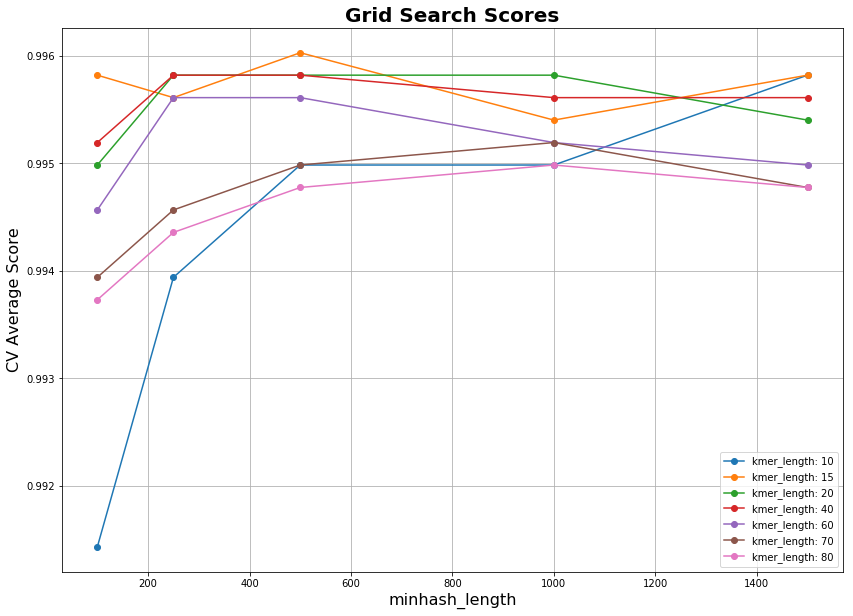

In [133]:
plot_grid_search(grid_search.cv_results_, parameters['minhash_length'], 
                 parameters['kmer_length'], 'minhash_length','kmer_length')

## Test - Penalize unbalanced categories
* Each minhash category association is no longer worth 1 point
* Each minhash category association is worth 1 - (Cat Count / Sum(All Category Counts))
* Unbalanced categories are penalized the larger they become based on the percentage of all 

In [134]:
import numpy as np
from sys import maxsize
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted, check_random_state
from sklearn.utils.multiclass import unique_labels

class StrandClassifierV2(BaseEstimator, ClassifierMixin):
    """
    Parameters
    ----------
    X_ : ndarray, shape (n_samples, n_features)
         The input passed during :meth:`fit`.
    y_ : ndarray, shape (n_samples,)
         The labels passed during :meth:`fit`.
    classes_ : ndarray, shape (n_classes,)
              The classes seen at :meth:`fit`.
    kmer_length : integer, breaking the gene sequence into chunks of this length  
    minhash_length: integer, the number of minhash values to be included in the minhash signature. 
                    Longer minhash signatures approximate Jaccard Similarity more accurately and take 
                    more time to create. The total number of randomly seeded hashing functions is 
                    also controlled by the value in minhash_length.
    minhash_store_ : dict() array, shape (minhash_length), key == minhash int, value = category array int
                      Partitions unique minhash values and category associations by hash function.
    """
    def __init__(self, kmer_length=20, minhash_length=100, random_state=None):
        self.kmer_length = kmer_length
        self.random_state = random_state
        self.minhash_length = minhash_length
        
    def fit(self, X, y):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The training input samples.
        y : array-like, shape (n_samples,)
            The target values. An array of int.
        Returns
        -------
        self : object
            Returns self.
        """
        self.random_state_ = check_random_state(self.random_state)
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y, ensure_2d=False, dtype=None)
        
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        
        # Store the training data (X) and targets (y) used to fit the model
        self.X_ = X
        self.y_ = y
        
        # Store the minhash values and respective categories
        self.minhash_store_ = dict()
        
        # Train the model for X and y
        for sequence, category in zip(X, y):   
            # Create minhash signatures for each sequence
            signature = self.create_minhash_signature(sequence)
            # Store minhash values and respective categories to minhash_store_ partitioned by hash function 
            self.add_signature_to_minhash_store(category, signature)
        
        # Add up our category training totals and grand total
        cat_totals = dict()

        for categories in self.minhash_store_.values():
            for category in categories:
                cat_subtotal = cat_totals.get(category, None)
                if cat_subtotal == None:
                    cat_totals[category] = 1
                else:
                    cat_totals[category] += 1

        self.cat_totals_ = cat_totals
        self.cat_grand_total_ = sum(cat_totals.values())
        
        #weight each category using the formula for IDF 
        for category, cat_tot in self.cat_totals_.items():
            cat_tot = 1 - (cat_tot / self.cat_grand_total_)
            self.cat_totals_[category] = cat_tot

        # Return the classifier
        return self

    def predict(self, X):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        y : ndarray, shape (n_samples,)
            The label for each sample is the label of the closest sample
            seen during fit.
        """
        # Check is fit had been called
        check_is_fitted(self, ['X_', 'y_'])

        # Input validation
        X = check_array(X, ensure_2d=False, dtype=None)
        
        yhats = []
        for sequence in X:
            # Create a minhash signature from the sequence X
            signature = self.create_minhash_signature(sequence)
            # Score all categories using the minhash signature  
            category_scores = self.get_category_scores(signature)
            #Get the first category with the highest score
            winning_category = max(category_scores, key=category_scores.get)
            #Add to our predictions
            yhats.append(winning_category)
        
        return yhats
    
    def kmer_generator(self, sequence='', kmer_length=0):
        kmer_count = len(sequence) - (kmer_length - 1)
        for i in range(0, kmer_count):
            yield sequence[i:i + kmer_length]
    
    def create_minhash_signature(self, sequence):
        """
        Parameters
        ----------
        sequence : string, A gene sequence or other string data to be broken into kmers.
        ----------
        signature : array of int, shape (minhash_length), minimum hash value produced by each hash function
                    after hashing all kmers generated from sequence.
        """
        #Break sequence into hashed kmers, then sort
        kmer_hashes = [hash(kmer) for kmer in self.kmer_generator(sequence,self.kmer_length)]
        kmer_hashes.sort()
        #Take the first minhash_length hashes to create the signature 
        signature = kmer_hashes[:self.minhash_length]
        return signature
    
    def add_signature_to_minhash_store(self, category, minhash_signature):
        '''
        Parameters
        ----------
        category : int or string, the category value associated with this minhash_signature
        minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence. 
        '''
        # Add each minhash value and category to the minhash store
        for minhash_value in minhash_signature:
            # Do we already have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories == None:
                # No, so create a new category set for this minhash value
                self.minhash_store_[minhash_value] = {category}
            else: 
                #Yes, add the category to the minhash value's category set
                minhash_categories.add(category)
        return 
    
    '''
    Parameters
    ----------
    minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence.
    Returns
    ----------
    class_scores : dict, shape (minhash_length), key = category, value = category score int
                   The count of categories associated with each hash function's minhash value. 
    '''
    def get_category_scores(self, minhash_signature):
        # Create a dictionary of category / class scores
        class_scores = dict.fromkeys(self.classes_ , 0)
        # lookup minhash values in minhash stores 
        for minhash_value in minhash_signature:
            # Do we have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories != None:
                # Yes, add 1 for each category in the set  
                for category in minhash_categories:
                    #class_scores[category] += 1
                    # Lookup the IDF weighted scores
                    class_scores[category] += self.cat_totals_[category]
        return class_scores

In [135]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# create cross validation iterator
cv = StratifiedKFold(n_splits=10, random_state=42)

strand = StrandClassifierV2(random_state=42)

parameters = { 'kmer_length':[10,15,20,40,60,70,80]
              ,'minhash_length': [100,250,500,1000,1500]
             }

grid_search = GridSearchCV(estimator=strand
                   , n_jobs=-1 # jobs to run in parallel
                   , verbose=1 # low verbosity in output messages
                   , param_grid=parameters
                   , cv=cv
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
grid_search.fit(X, y)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  9.5min finished


Wall time: 9min 34s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=StrandClassifierV2(kmer_length=20, minhash_length=100,
                                          random_state=42),
             iid='warn', n_jobs=-1,
             param_grid={'kmer_length': [10, 15, 20, 40, 60, 70, 80],
                         'minhash_length': [100, 250, 500, 1000, 1500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [136]:
grid_search.best_estimator_

StrandClassifierV2(kmer_length=20, minhash_length=500, random_state=42)

In [137]:
print('Highest CV Mean Accuracy')
max(grid_search.cv_results_['mean_test_score'])

Highest CV Mean Accuracy


0.9964479732553281

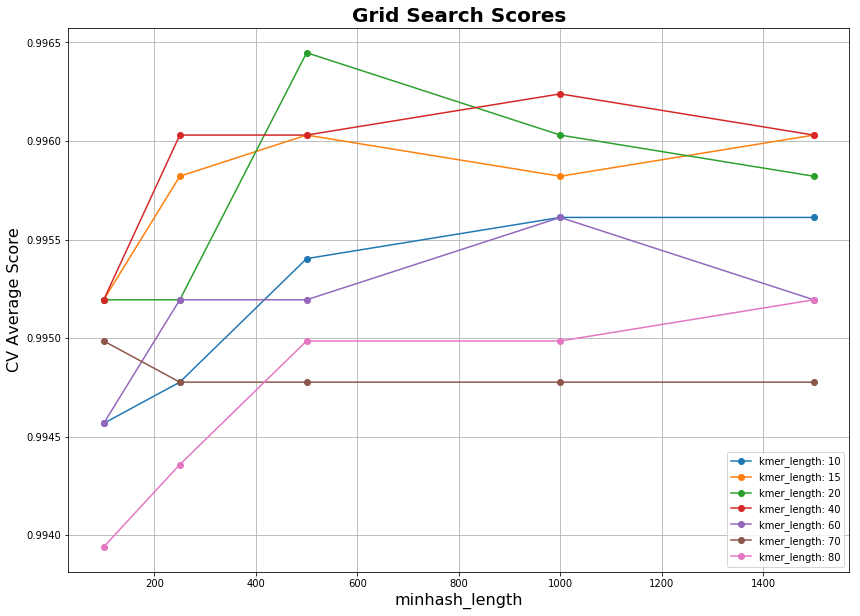

In [138]:
plot_grid_search(grid_search.cv_results_, parameters['minhash_length'], 
                 parameters['kmer_length'], 'minhash_length','kmer_length')

## Test - Penalize unbalanced categories and multiple category associations

### Unbalanced Categories
* Each minhash category association is no longer worth 1 point
* Each minhash category association is worth 1 - (Cat Count / Sum(All Category Counts))
* Unbalanced categories are penalized the larger they become based on the percentage of all 

### Multiple Category Associations
* When the minhash is associated with more than 1 category, 
* During predictions, divide the category's point value equally across each associated category

In [139]:
import numpy as np
from sys import maxsize
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted, check_random_state
from sklearn.utils.multiclass import unique_labels

class StrandClassifierV2(BaseEstimator, ClassifierMixin):
    """
    Parameters
    ----------
    X_ : ndarray, shape (n_samples, n_features)
         The input passed during :meth:`fit`.
    y_ : ndarray, shape (n_samples,)
         The labels passed during :meth:`fit`.
    classes_ : ndarray, shape (n_classes,)
              The classes seen at :meth:`fit`.
    kmer_length : integer, breaking the gene sequence into chunks of this length  
    minhash_length: integer, the number of minhash values to be included in the minhash signature. 
                    Longer minhash signatures approximate Jaccard Similarity more accurately and take 
                    more time to create. The total number of randomly seeded hashing functions is 
                    also controlled by the value in minhash_length.
    minhash_store_ : dict() array, shape (minhash_length), key == minhash int, value = category array int
                      Partitions unique minhash values and category associations by hash function.
    """
    def __init__(self, kmer_length=20, minhash_length=100, random_state=None):
        self.kmer_length = kmer_length
        self.random_state = random_state
        self.minhash_length = minhash_length
        
    def fit(self, X, y):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The training input samples.
        y : array-like, shape (n_samples,)
            The target values. An array of int.
        Returns
        -------
        self : object
            Returns self.
        """
        self.random_state_ = check_random_state(self.random_state)
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y, ensure_2d=False, dtype=None)
        
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        
        # Store the training data (X) and targets (y) used to fit the model
        self.X_ = X
        self.y_ = y
        
        # Store the minhash values and respective categories
        self.minhash_store_ = dict()
        
        # Train the model for X and y
        for sequence, category in zip(X, y):   
            # Create minhash signatures for each sequence
            signature = self.create_minhash_signature(sequence)
            # Store minhash values and respective categories to minhash_store_ partitioned by hash function 
            self.add_signature_to_minhash_store(category, signature)
        
        # Add up our category training totals and grand total
        cat_totals = dict()

        for categories in self.minhash_store_.values():
            for category in categories:
                cat_subtotal = cat_totals.get(category, None)
                if cat_subtotal == None:
                    cat_totals[category] = 1
                else:
                    cat_totals[category] += 1

        self.cat_totals_ = cat_totals
        self.cat_grand_total_ = sum(cat_totals.values())
        
        #weight each category using the formula for IDF 
        for category, cat_tot in self.cat_totals_.items():
            cat_tot = 1 - (cat_tot / self.cat_grand_total_)
            self.cat_totals_[category] = cat_tot

        # Return the classifier
        return self

    def predict(self, X):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        y : ndarray, shape (n_samples,)
            The label for each sample is the label of the closest sample
            seen during fit.
        """
        # Check is fit had been called
        check_is_fitted(self, ['X_', 'y_'])

        # Input validation
        X = check_array(X, ensure_2d=False, dtype=None)
        
        yhats = []
        for sequence in X:
            # Create a minhash signature from the sequence X
            signature = self.create_minhash_signature(sequence)
            # Score all categories using the minhash signature  
            category_scores = self.get_category_scores(signature)
            #Get the first category with the highest score
            winning_category = max(category_scores, key=category_scores.get)
            #Add to our predictions
            yhats.append(winning_category)
        
        return yhats
    
    def kmer_generator(self, sequence='', kmer_length=0):
        kmer_count = len(sequence) - (kmer_length - 1)
        for i in range(0, kmer_count):
            yield sequence[i:i + kmer_length]
    
    def create_minhash_signature(self, sequence):
        """
        Parameters
        ----------
        sequence : string, A gene sequence or other string data to be broken into kmers.
        ----------
        signature : array of int, shape (minhash_length), minimum hash value produced by each hash function
                    after hashing all kmers generated from sequence.
        """
        #Break sequence into hashed kmers, then sort
        kmer_hashes = [hash(kmer) for kmer in self.kmer_generator(sequence,self.kmer_length)]
        kmer_hashes.sort()
        #Take the first minhash_length hashes to create the signature 
        signature = kmer_hashes[:self.minhash_length]
        return signature
    
    def add_signature_to_minhash_store(self, category, minhash_signature):
        '''
        Parameters
        ----------
        category : int or string, the category value associated with this minhash_signature
        minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence. 
        '''
        # Add each minhash value and category to the minhash store
        for minhash_value in minhash_signature:
            # Do we already have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories == None:
                # No, so create a new category set for this minhash value
                self.minhash_store_[minhash_value] = {category}
            else: 
                #Yes, add the category to the minhash value's category set
                minhash_categories.add(category)
        return 
    
    '''
    Parameters
    ----------
    minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence.
    Returns
    ----------
    class_scores : dict, shape (minhash_length), key = category, value = category score int
                   The count of categories associated with each hash function's minhash value. 
    '''
    def get_category_scores(self, minhash_signature):
        # Create a dictionary of category / class scores
        class_scores = dict.fromkeys(self.classes_ , 0)
        # lookup minhash values in minhash stores 
        for minhash_value in minhash_signature:
            # Do we have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories != None:
                # Yes, add 1 for each category in the set  
                for category in minhash_categories:
                    # Get the category's weighted score 
                    cate_weighted_score = self.cat_totals_[category]
                    
                    # Calculate minhash level score value based on how many 
                    #  categories a particular minhash is associated with.
                    score_value = cate_weighted_score / len(minhash_categories)
                    
                    # Lookup the IDF weighted scores
                    class_scores[category] += score_value
        return class_scores

In [140]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# create cross validation iterator
cv = StratifiedKFold(n_splits=10, random_state=42)

strand = StrandClassifierV2(random_state=42)

parameters = { 'kmer_length':[10,15,20,40,60,70,80]
              ,'minhash_length': [100,250,500,1000,1500]
             }

grid_search = GridSearchCV(estimator=strand
                   , n_jobs=-1 # jobs to run in parallel
                   , verbose=1 # low verbosity in output messages
                   , param_grid=parameters
                   , cv=cv
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
grid_search.fit(X, y)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  9.7min finished


Wall time: 9min 51s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=StrandClassifierV2(kmer_length=20, minhash_length=100,
                                          random_state=42),
             iid='warn', n_jobs=-1,
             param_grid={'kmer_length': [10, 15, 20, 40, 60, 70, 80],
                         'minhash_length': [100, 250, 500, 1000, 1500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [141]:
grid_search.best_estimator_

StrandClassifierV2(kmer_length=10, minhash_length=1000, random_state=42)

In [142]:
print('Highest CV Mean Accuracy')
max(grid_search.cv_results_['mean_test_score'])

Highest CV Mean Accuracy


0.9960300877559549

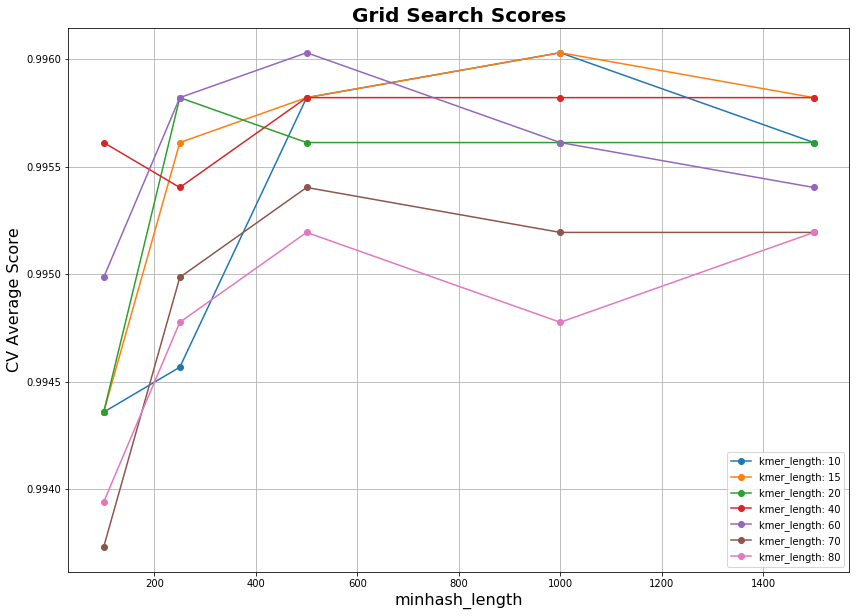

In [143]:
plot_grid_search(grid_search.cv_results_, parameters['minhash_length'], 
                 parameters['kmer_length'], 'minhash_length','kmer_length')

## Test - Oversample predictions, Penalize unbalanced categories and multiple category associations

### Score all minhash values during a prediction
* Modified create_minhash_signature() to include a specified length
* During .predict() score all kmers from the minhash signature against each category. 

### Unbalanced Categories
* Each minhash category association is no longer worth 1 point
* Each minhash category association is worth 1 - (Cat Count / Sum(All Category Counts))
* Unbalanced categories are penalized the larger they become based on the percentage of all 

### Multiple Category Associations
* When the minhash is associated with more than 1 category, 
* During predictions, divide the category's point value equally across each associated category

In [11]:
import numpy as np
from sys import maxsize
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted, check_random_state
from sklearn.utils.multiclass import unique_labels

class StrandClassifierV2(BaseEstimator, ClassifierMixin):
    """
    Parameters
    ----------
    X_ : ndarray, shape (n_samples, n_features)
         The input passed during :meth:`fit`.
    y_ : ndarray, shape (n_samples,)
         The labels passed during :meth:`fit`.
    classes_ : ndarray, shape (n_classes,)
              The classes seen at :meth:`fit`.
    kmer_length : integer, breaking the gene sequence into chunks of this length  
    minhash_length: integer, the number of minhash values to be included in the minhash signature. 
                    Longer minhash signatures approximate Jaccard Similarity more accurately and take 
                    more time to create. The total number of randomly seeded hashing functions is 
                    also controlled by the value in minhash_length.
    minhash_store_ : dict() array, shape (minhash_length), key == minhash int, value = category array int
                      Partitions unique minhash values and category associations by hash function.
    """
    def __init__(self, kmer_length=20, minhash_length=100, random_state=None):
        self.kmer_length = kmer_length
        self.random_state = random_state
        self.minhash_length = minhash_length
        
    def fit(self, X, y):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The training input samples.
        y : array-like, shape (n_samples,)
            The target values. An array of int.
        Returns
        -------
        self : object
            Returns self.
        """
        self.random_state_ = check_random_state(self.random_state)
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y, ensure_2d=False, dtype=None)
        
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        
        # Store the training data (X) and targets (y) used to fit the model
        self.X_ = X
        self.y_ = y
        
        # Store the minhash values and respective categories
        self.minhash_store_ = dict()
        
        # Train the model for X and y
        for sequence, category in zip(X, y):   
            # Create minhash signatures for each sequence
            signature = self.create_minhash_signature(sequence, self.minhash_length)
            # Store minhash values and respective categories to minhash_store_ partitioned by hash function 
            self.add_signature_to_minhash_store(category, signature)
        
        # Add up our category training totals and grand total
        cat_totals = dict()

        for categories in self.minhash_store_.values():
            for category in categories:
                cat_subtotal = cat_totals.get(category, None)
                if cat_subtotal == None:
                    cat_totals[category] = 1
                else:
                    cat_totals[category] += 1

        self.cat_totals_ = cat_totals
        self.cat_grand_total_ = sum(cat_totals.values())
        
        #weight each category using the formula for IDF 
        for category, cat_tot in self.cat_totals_.items():
            cat_tot = 1 - (cat_tot / self.cat_grand_total_)
            self.cat_totals_[category] = cat_tot

        # Return the classifier
        return self

    def predict(self, X):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        y : ndarray, shape (n_samples,)
            The label for each sample is the label of the closest sample
            seen during fit.
        """
        # Check is fit had been called
        check_is_fitted(self, ['X_', 'y_'])

        # Input validation
        X = check_array(X, ensure_2d=False, dtype=None)
        
        yhats = []
        for sequence in X:
            # Create a minhash signature from the sequence X
            signature = self.create_minhash_signature(sequence)
            # Score all categories using the minhash signature  
            category_scores = self.get_category_scores(signature)
            #Get the first category with the highest score
            winning_category = max(category_scores, key=category_scores.get)
            #Add to our predictions
            yhats.append(winning_category)
        
        return yhats
    
    def kmer_generator(self, sequence='', kmer_length=0):
        kmer_count = len(sequence) - (kmer_length - 1)
        for i in range(0, kmer_count):
            yield sequence[i:i + kmer_length]
    
    def create_minhash_signature(self, sequence, minhash_length=None):
        """
        Parameters
        ----------
        sequence : string, A gene sequence or other string data to be broken into kmers.
        ----------
        signature : array of int, shape (minhash_length), minimum hash value produced by each hash function
                    after hashing all kmers generated from sequence.
        """
        #Break sequence into hashed kmers, then sort
        kmer_hashes = [hash(kmer) for kmer in self.kmer_generator(sequence,self.kmer_length)]
        kmer_hashes.sort()
        
        if minhash_length==None:
            #Return all of the kmer_hashes as the signature 
            signature = kmer_hashes
        else:
            #Take the first minhash_length hashes to create the signature 
            signature = kmer_hashes[:minhash_length]
            
        return signature
    
    def add_signature_to_minhash_store(self, category, minhash_signature):
        '''
        Parameters
        ----------
        category : int or string, the category value associated with this minhash_signature
        minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence. 
        '''
        # Add each minhash value and category to the minhash store
        for minhash_value in minhash_signature:
            # Do we already have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories == None:
                # No, so create a new category set for this minhash value
                self.minhash_store_[minhash_value] = {category}
            else: 
                #Yes, add the category to the minhash value's category set
                minhash_categories.add(category)
        return 
    
    '''
    Parameters
    ----------
    minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence.
    Returns
    ----------
    class_scores : dict, shape (minhash_length), key = category, value = category score int
                   The count of categories associated with each hash function's minhash value. 
    '''
    def get_category_scores(self, minhash_signature):
        # Create a dictionary of category / class scores
        class_scores = dict.fromkeys(self.classes_ , 0)
        # lookup minhash values in minhash stores 
        for minhash_value in minhash_signature:
            # Do we have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories != None:
                # Yes, add 1 for each category in the set  
                for category in minhash_categories:
                    # Get the category's weighted score 
                    cate_weighted_score = self.cat_totals_[category]
                    
                    # Calculate minhash level score value based on how many 
                    #  categories a particular minhash is associated with.
                    score_value = cate_weighted_score / len(minhash_categories)
                    
                    # Lookup the IDF weighted scores
                    class_scores[category] += score_value
        return class_scores

In [12]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# create cross validation iterator
cv = StratifiedKFold(n_splits=10, random_state=42)

strand = StrandClassifierV2(random_state=42)

parameters = { 'kmer_length':[10,15,20,40,60,70,80]
              ,'minhash_length': [100,250,500,1000,1500]
             }

grid_search = GridSearchCV(estimator=strand
                   , n_jobs=-1 # jobs to run in parallel
                   , verbose=1 # low verbosity in output messages
                   , param_grid=parameters
                   , cv=cv
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
grid_search.fit(X, y)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed: 10.4min finished
C:\Users\Jake\Anaconda3\envs\ML7331\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 10min 31s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=StrandClassifierV2(kmer_length=20, minhash_length=100,
                                          random_state=42),
             iid='warn', n_jobs=-1,
             param_grid={'kmer_length': [10, 15, 20, 40, 60, 70, 80],
                         'minhash_length': [100, 250, 500, 1000, 1500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [13]:
grid_search.best_estimator_

StrandClassifierV2(kmer_length=15, minhash_length=1500, random_state=42)

In [14]:
print('Highest CV Mean Accuracy')
max(grid_search.cv_results_['mean_test_score'])

Highest CV Mean Accuracy


0.9958211450062683

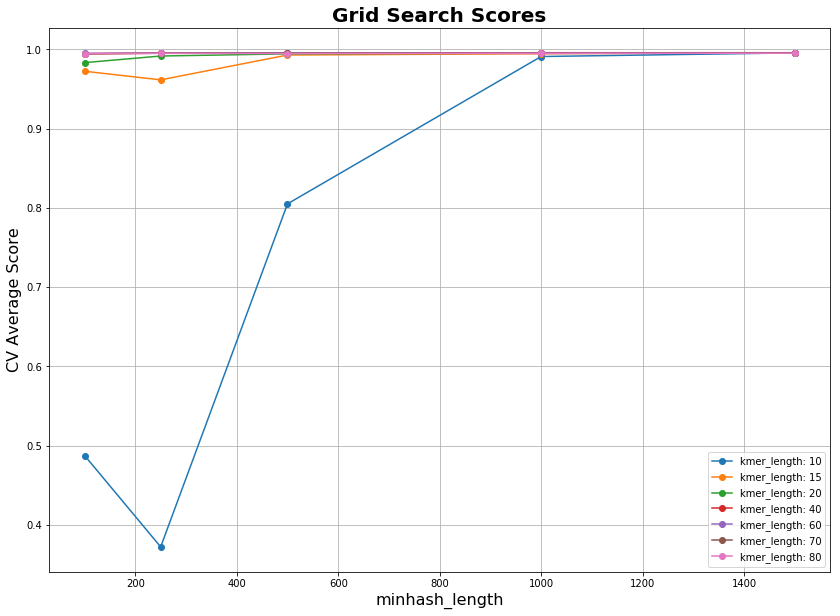

In [15]:
plot_grid_search(grid_search.cv_results_, parameters['minhash_length'], 
                 parameters['kmer_length'], 'minhash_length','kmer_length')

## Test - Oversample predictions, No Category Penalties 

### Score all minhash values during a prediction
* Modified create_minhash_signature() to include a specified length
* During .predict() score all kmers from the minhash signature against each category.

In [20]:
import numpy as np
from sys import maxsize
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted, check_random_state
from sklearn.utils.multiclass import unique_labels

class StrandClassifierV2(BaseEstimator, ClassifierMixin):
    """
    Parameters
    ----------
    X_ : ndarray, shape (n_samples, n_features)
         The input passed during :meth:`fit`.
    y_ : ndarray, shape (n_samples,)
         The labels passed during :meth:`fit`.
    classes_ : ndarray, shape (n_classes,)
              The classes seen at :meth:`fit`.
    kmer_length : integer, breaking the gene sequence into chunks of this length  
    minhash_length: integer, the number of minhash values to be included in the minhash signature. 
                    Longer minhash signatures approximate Jaccard Similarity more accurately and take 
                    more time to create. The total number of randomly seeded hashing functions is 
                    also controlled by the value in minhash_length.
    minhash_store_ : dict() array, shape (minhash_length), key == minhash int, value = category array int
                      Partitions unique minhash values and category associations by hash function.
    """
    def __init__(self, kmer_length=20, minhash_length=100, random_state=None):
        self.kmer_length = kmer_length
        self.random_state = random_state
        self.minhash_length = minhash_length
        
    def fit(self, X, y):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The training input samples.
        y : array-like, shape (n_samples,)
            The target values. An array of int.
        Returns
        -------
        self : object
            Returns self.
        """
        self.random_state_ = check_random_state(self.random_state)
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y, ensure_2d=False, dtype=None)
        
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        
        # Store the training data (X) and targets (y) used to fit the model
        self.X_ = X
        self.y_ = y
        
        # Store the minhash values and respective categories
        self.minhash_store_ = dict()
        
        # Train the model for X and y
        for sequence, category in zip(X, y):   
            # Create minhash signatures for each sequence
            signature = self.create_minhash_signature(sequence, self.minhash_length)
            # Store minhash values and respective categories to minhash_store_ partitioned by hash function 
            self.add_signature_to_minhash_store(category, signature)
            
        # Return the classifier
        return self

    def predict(self, X):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        y : ndarray, shape (n_samples,)
            The label for each sample is the label of the closest sample
            seen during fit.
        """
        # Check is fit had been called
        check_is_fitted(self, ['X_', 'y_'])

        # Input validation
        X = check_array(X, ensure_2d=False, dtype=None)
        
        yhats = []
        self.winning_scores_ = []
        self.scores_sums_ = []
        
        for sequence in X:
            # Create a minhash signature from the sequence X
            signature = self.create_minhash_signature(sequence)
            # Score all categories using the minhash signature  
            category_scores = self.get_category_scores(signature)
            #Get the first category with the highest score
            winning_category = max(category_scores, key=category_scores.get)
            #Add to our predictions
            yhats.append(winning_category)
            #get the the number of votes for the winning category
            self.winning_scores_.append(max(category_scores.values()))
            #get the the number of votes for the winning category
            self.scores_sums_.append(sum(category_scores.values()))
            
        
        return yhats
    
    def kmer_generator(self, sequence='', kmer_length=0):
        kmer_count = len(sequence) - (kmer_length - 1)
        for i in range(0, kmer_count):
            yield sequence[i:i + kmer_length]
    
    def create_minhash_signature(self, sequence, minhash_length=None):
        """
        Parameters
        ----------
        sequence : string, A gene sequence or other string data to be broken into kmers.
        ----------
        signature : array of int, shape (minhash_length), minimum hash value produced by each hash function
                    after hashing all kmers generated from sequence.
        """
        #Break sequence into hashed kmers, then sort
        kmer_hashes = [hash(kmer) for kmer in self.kmer_generator(sequence,self.kmer_length)]
        kmer_hashes.sort()
        
        if minhash_length==None:
            #Return all of the kmer_hashes as the signature 
            signature = kmer_hashes
        else:
            #Take the first minhash_length hashes to create the signature 
            signature = kmer_hashes[:minhash_length]
            
        return signature
    
    def add_signature_to_minhash_store(self, category, minhash_signature):
        '''
        Parameters
        ----------
        category : int or string, the category value associated with this minhash_signature
        minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence. 
        '''
        # Add each minhash value and category to the minhash store
        for minhash_value in minhash_signature:
            # Do we already have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories == None:
                # No, so create a new category set for this minhash value
                self.minhash_store_[minhash_value] = {category}
            else: 
                #Yes, add the category to the minhash value's category set
                minhash_categories.add(category)
        return 
    
    '''
    Parameters
    ----------
    minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence.
    Returns
    ----------
    class_scores : dict, shape (minhash_length), key = category, value = category score int
                   The count of categories associated with each hash function's minhash value. 
    '''
    def get_category_scores(self, minhash_signature):
        # Create a dictionary of category / class scores
        class_scores = dict.fromkeys(self.classes_ , 0)
        # lookup minhash values in minhash stores 
        for minhash_value in minhash_signature:
            # Do we have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories != None:
                # Yes, add 1 for each category in the set  
                for category in minhash_categories:
                    class_scores[category] += 1
        return class_scores

In [21]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# create cross validation iterator
cv = StratifiedKFold(n_splits=10, random_state=42)

strand = StrandClassifierV2(random_state=42)

parameters = { 'kmer_length':[10,15,20,40,60,70,80]
              ,'minhash_length': [100,250,500,1000,1500]
             }

grid_search = GridSearchCV(estimator=strand
                   , n_jobs=-1 # jobs to run in parallel
                   , verbose=1 # low verbosity in output messages
                   , param_grid=parameters
                   , cv=cv
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
grid_search.fit(X, y)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  9.0min finished


Wall time: 9min 5s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=StrandClassifierV2(kmer_length=20, minhash_length=100,
                                          random_state=42),
             iid='warn', n_jobs=-1,
             param_grid={'kmer_length': [10, 15, 20, 40, 60, 70, 80],
                         'minhash_length': [100, 250, 500, 1000, 1500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [22]:
grid_search.best_estimator_

StrandClassifierV2(kmer_length=20, minhash_length=1500, random_state=42)

In [23]:
print('Highest CV Mean Accuracy')
max(grid_search.cv_results_['mean_test_score'])

Highest CV Mean Accuracy


0.9960300877559549

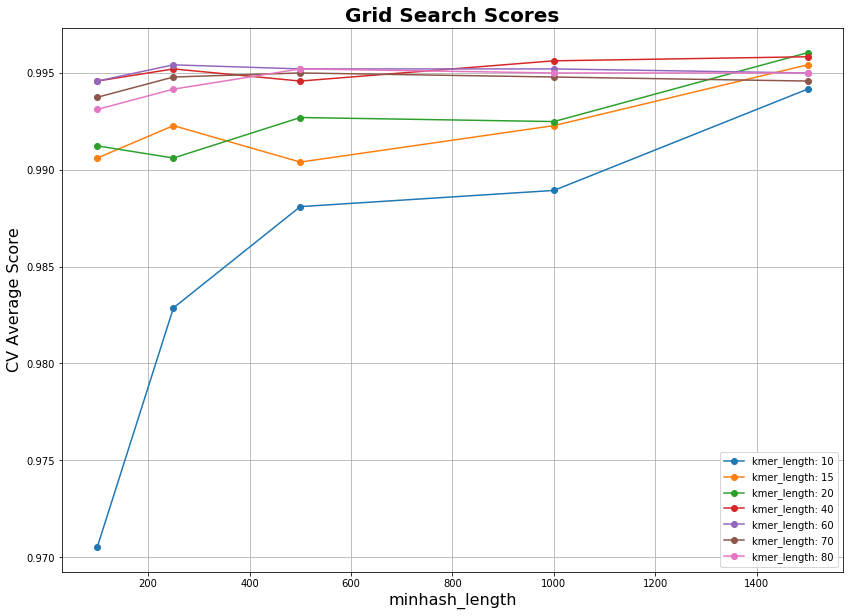

In [24]:
plot_grid_search(grid_search.cv_results_, parameters['minhash_length'], 
                 parameters['kmer_length'], 'minhash_length','kmer_length')

### Test - Category based Inverse Document Frequency
* Categories are documents 
* IDf = log(C / c) where C = Total # of categories and c = total categrories for a given minhash 

In [34]:
import numpy as np
from sys import maxsize
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted, check_random_state
from sklearn.utils.multiclass import unique_labels

class StrandClassifierV2(BaseEstimator, ClassifierMixin):
    """
    Parameters
    ----------
    X_ : ndarray, shape (n_samples, n_features)
         The input passed during :meth:`fit`.
    y_ : ndarray, shape (n_samples,)
         The labels passed during :meth:`fit`.
    classes_ : ndarray, shape (n_classes,)
              The classes seen at :meth:`fit`.
    kmer_length : integer, breaking the gene sequence into chunks of this length  
    minhash_length: integer, the number of minhash values to be included in the minhash signature. 
                    Longer minhash signatures approximate Jaccard Similarity more accurately and take 
                    more time to create. The total number of randomly seeded hashing functions is 
                    also controlled by the value in minhash_length.
    minhash_store_ : dict() array, shape (minhash_length), key == minhash int, value = category array int
                      Partitions unique minhash values and category associations by hash function.
    """
    def __init__(self, kmer_length=20, minhash_length=100, random_state=None):
        self.kmer_length = kmer_length
        self.random_state = random_state
        self.minhash_length = minhash_length
        
    def fit(self, X, y):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The training input samples.
        y : array-like, shape (n_samples,)
            The target values. An array of int.
        Returns
        -------
        self : object
            Returns self.
        """
        self.random_state_ = check_random_state(self.random_state)
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y, ensure_2d=False, dtype=None)
        
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        
        # Store the training data (X) and targets (y) used to fit the model
        self.X_ = X
        self.y_ = y
        
        # Store the minhash values and respective categories
        # Count Minhashes per category & Total minhashes 
        self.minhash_store_ = dict()
        
        # Train the model for X and y
        for sequence, category in zip(X, y):   
            # Create minhash signatures for each sequence
            signature = self.create_minhash_signature(sequence)
            # Store minhash values and respective categories to minhash_store_ partitioned by hash function 
            self.add_signature_to_minhash_store(category, signature)
        
        # Add up our category training totals and grand total
        cat_totals = dict()

        for categories in self.minhash_store_.values():
            for category in categories:
                cat_subtotal = cat_totals.get(category, None)
                if cat_subtotal == None:
                    cat_totals[category] = 1
                else:
                    cat_totals[category] += 1

        self.cat_totals_ = cat_totals
        self.cat_grand_total_ = sum(cat_totals.values())
    
        # Return the classifier
        return self

    def predict(self, X):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        y : ndarray, shape (n_samples,)
            The label for each sample is the label of the closest sample
            seen during fit.
        """
        # Check is fit had been called
        check_is_fitted(self, ['X_', 'y_'])

        # Input validation
        X = check_array(X, ensure_2d=False, dtype=None)
        
        yhats = []
        for sequence in X:
            # Create a minhash signature from the sequence X
            signature = self.create_minhash_signature(sequence)
            # Score all categories using the minhash signature  
            category_scores = self.get_category_scores(signature)
            #Get the first category with the highest score
            winning_category = max(category_scores, key=category_scores.get)
            #Add to our predictions
            yhats.append(winning_category)
        
        return yhats
    
    def kmer_generator(self, sequence='', kmer_length=0):
        kmer_count = len(sequence) - (kmer_length - 1)
        for i in range(0, kmer_count):
            yield sequence[i:i + kmer_length]
    
    def create_minhash_signature(self, sequence):
        """
        Parameters
        ----------
        sequence : string, A gene sequence or other string data to be broken into kmers.
        ----------
        signature : array of int, shape (minhash_length), minimum hash value produced by each hash function
                    after hashing all kmers generated from sequence.
        """
        #Break sequence into hashed kmers, then sort
        kmer_hashes = [hash(kmer) for kmer in self.kmer_generator(sequence,self.kmer_length)]
        kmer_hashes.sort()
        #Take the first minhash_length hashes to create the signature 
        signature = kmer_hashes[:self.minhash_length]
        return signature
    
    def add_signature_to_minhash_store(self, category, minhash_signature):
        '''
        Parameters
        ----------
        category : int or string, the category value associated with this minhash_signature
        minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence. 
        '''
        # Add each minhash value and category to the minhash store
        for minhash_value in minhash_signature:
            # Do we already have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories == None:
                # No, so create a new category set for this minhash value
                self.minhash_store_[minhash_value] = {category}
            else: 
                #Yes, add the category to the minhash value's category set
                minhash_categories.add(category)
        return 
    
    '''
    Parameters
    ----------
    minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence.
    Returns
    ----------
    class_scores : dict, shape (minhash_length), key = category, value = category score int
                   The count of categories associated with each hash function's minhash value. 
    '''
    def get_category_scores(self, minhash_signature):
        # Create a dictionary of category / class scores
        class_scores = dict.fromkeys(self.classes_ , 0)
        # lookup minhash values in minhash stores 
        for minhash_value in minhash_signature:
            # Do we have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories != None:
                # Yes, add 1 for each category in the set  
                for category in minhash_categories:
                    #Calculate the category idf for each category
                    cat_idf = np.log(self.cat_grand_total_ / self.cat_totals_[category])
                    #Add the category ifd to each category's class total
                    class_scores[category] += cat_idf
        return class_scores

In [41]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# create cross validation iterator
cv = StratifiedKFold(n_splits=10, random_state=42)

strand = StrandClassifierV2(random_state=42)

parameters = { 'kmer_length':[10,15,20,40,60,70,80]
              ,'minhash_length': [100,250,500,1000,1500]
             }

grid_search = GridSearchCV(estimator=strand
                   , n_jobs=-1 # jobs to run in parallel
                   , verbose=1 # low verbosity in output messages
                   , param_grid=parameters
                   , cv=cv
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
grid_search.fit(X, y)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed: 13.6min finished


Wall time: 13min 40s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=StrandClassifierV2(kmer_length=20, minhash_length=100,
                                          random_state=42),
             iid='warn', n_jobs=-1,
             param_grid={'kmer_length': [10, 15, 20, 40, 60, 70, 80],
                         'minhash_length': [100, 250, 500, 1000, 1500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [42]:
grid_search.best_estimator_

StrandClassifierV2(kmer_length=70, minhash_length=100, random_state=42)

In [43]:
print('Highest CV Mean Accuracy')
max(grid_search.cv_results_['mean_test_score'])

Highest CV Mean Accuracy


0.9947764312578353

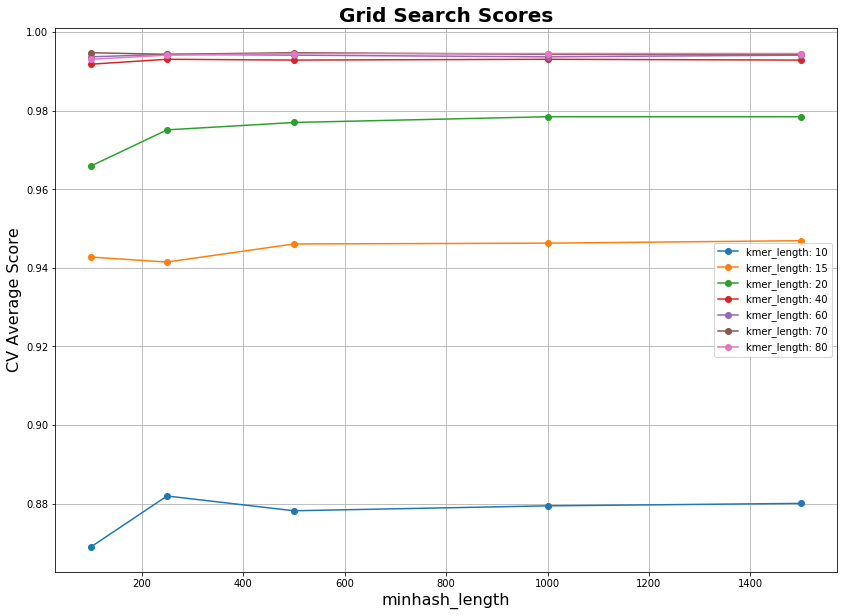

In [44]:
plot_grid_search(grid_search.cv_results_, parameters['minhash_length'], 
                 parameters['kmer_length'], 'minhash_length','kmer_length')

### Test - Category size adjusted kmers * Category based Inverse Document Frequency
* **IFD**
 * Categories are documents 
 * IDf = log(C / c) where C = Total # of categories and c = total categories for a given minhash 
* **Category size adjusted kmers**
 * Like Term Frequency adjusted for document length (TF / terms in document)
 * All minhash frequencies == 1
 * So Category frequency adjusted for Category length:
 * 1 / Category Total frequency 
* **Finally ACF-CIDF:**
 * ACF-CIDF = acf * cidf
 * ACF = 1 / Category Total frequency 
 * CIDF = log(Total # of Categories / total categories for a given minhash word)

In [45]:
import numpy as np
from sys import maxsize
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted, check_random_state
from sklearn.utils.multiclass import unique_labels

class StrandClassifierV2(BaseEstimator, ClassifierMixin):
    """
    Parameters
    ----------
    X_ : ndarray, shape (n_samples, n_features)
         The input passed during :meth:`fit`.
    y_ : ndarray, shape (n_samples,)
         The labels passed during :meth:`fit`.
    classes_ : ndarray, shape (n_classes,)
              The classes seen at :meth:`fit`.
    kmer_length : integer, breaking the gene sequence into chunks of this length  
    minhash_length: integer, the number of minhash values to be included in the minhash signature. 
                    Longer minhash signatures approximate Jaccard Similarity more accurately and take 
                    more time to create. The total number of randomly seeded hashing functions is 
                    also controlled by the value in minhash_length.
    minhash_store_ : dict() array, shape (minhash_length), key == minhash int, value = category array int
                      Partitions unique minhash values and category associations by hash function.
    """
    def __init__(self, kmer_length=20, minhash_length=100, random_state=None):
        self.kmer_length = kmer_length
        self.random_state = random_state
        self.minhash_length = minhash_length
        
    def fit(self, X, y):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The training input samples.
        y : array-like, shape (n_samples,)
            The target values. An array of int.
        Returns
        -------
        self : object
            Returns self.
        """
        self.random_state_ = check_random_state(self.random_state)
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y, ensure_2d=False, dtype=None)
        
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        
        # Store the training data (X) and targets (y) used to fit the model
        self.X_ = X
        self.y_ = y
        
        # Store the minhash values and respective categories
        # Count Minhashes per category & Total minhashes 
        self.minhash_store_ = dict()
        
        # Train the model for X and y
        for sequence, category in zip(X, y):   
            # Create minhash signatures for each sequence
            signature = self.create_minhash_signature(sequence)
            # Store minhash values and respective categories to minhash_store_ partitioned by hash function 
            self.add_signature_to_minhash_store(category, signature)
        
        # Add up our category training totals and grand total
        cat_totals = dict()

        for categories in self.minhash_store_.values():
            for category in categories:
                cat_subtotal = cat_totals.get(category, None)
                if cat_subtotal == None:
                    cat_totals[category] = 1
                else:
                    cat_totals[category] += 1

        self.cat_totals_ = cat_totals
        self.cat_grand_total_ = sum(cat_totals.values())
    
        # Return the classifier
        return self

    def predict(self, X):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        y : ndarray, shape (n_samples,)
            The label for each sample is the label of the closest sample
            seen during fit.
        """
        # Check is fit had been called
        check_is_fitted(self, ['X_', 'y_'])

        # Input validation
        X = check_array(X, ensure_2d=False, dtype=None)
        
        yhats = []
        for sequence in X:
            # Create a minhash signature from the sequence X
            signature = self.create_minhash_signature(sequence)
            # Score all categories using the minhash signature  
            category_scores = self.get_category_scores(signature)
            #Get the first category with the highest score
            winning_category = max(category_scores, key=category_scores.get)
            #Add to our predictions
            yhats.append(winning_category)
        
        return yhats
    
    def kmer_generator(self, sequence='', kmer_length=0):
        kmer_count = len(sequence) - (kmer_length - 1)
        for i in range(0, kmer_count):
            yield sequence[i:i + kmer_length]
    
    def create_minhash_signature(self, sequence):
        """
        Parameters
        ----------
        sequence : string, A gene sequence or other string data to be broken into kmers.
        ----------
        signature : array of int, shape (minhash_length), minimum hash value produced by each hash function
                    after hashing all kmers generated from sequence.
        """
        #Break sequence into hashed kmers, then sort
        kmer_hashes = [hash(kmer) for kmer in self.kmer_generator(sequence,self.kmer_length)]
        kmer_hashes.sort()
        #Take the first minhash_length hashes to create the signature 
        signature = kmer_hashes[:self.minhash_length]
        return signature
    
    def add_signature_to_minhash_store(self, category, minhash_signature):
        '''
        Parameters
        ----------
        category : int or string, the category value associated with this minhash_signature
        minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence. 
        '''
        # Add each minhash value and category to the minhash store
        for minhash_value in minhash_signature:
            # Do we already have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories == None:
                # No, so create a new category set for this minhash value
                self.minhash_store_[minhash_value] = {category}
            else: 
                #Yes, add the category to the minhash value's category set
                minhash_categories.add(category)
        return 
    
    '''
    Parameters
    ----------
    minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence.
    Returns
    ----------
    class_scores : dict, shape (minhash_length), key = category, value = category score int
                   The count of categories associated with each hash function's minhash value. 
    '''
    def get_category_scores(self, minhash_signature):
        # Create a dictionary of category / class scores
        class_scores = dict.fromkeys(self.classes_ , 0)
        # lookup minhash values in minhash stores 
        for minhash_value in minhash_signature:
            # Do we have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories != None:
                # Yes, add 1 for each category in the set  
                for category in minhash_categories:
                    # Calculate the category idf for each category
                    cat_idf = np.log(self.cat_grand_total_ / self.cat_totals_[category])
                    # Calculate the category length adjusted frequency
                    acf = 1 / self.cat_totals_[category]
                    # Calcualte acf_cidf
                    acf_cidf = acf * cat_idf
                    #Add the category ifd to each category's class total
                    class_scores[category] += acf_cidf
        return class_scores

In [46]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# create cross validation iterator
cv = StratifiedKFold(n_splits=10, random_state=42)

strand = StrandClassifierV2(random_state=42)

parameters = { 'kmer_length':[10,15,20,40,60,70,80]
              ,'minhash_length': [100,250,500,1000,1500]
             }

grid_search = GridSearchCV(estimator=strand
                   , n_jobs=-1 # jobs to run in parallel
                   , verbose=1 # low verbosity in output messages
                   , param_grid=parameters
                   , cv=cv
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
grid_search.fit(X, y)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed: 14.1min finished
C:\Users\Jake\Anaconda3\envs\ML7331\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 14min 17s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=StrandClassifierV2(kmer_length=20, minhash_length=100,
                                          random_state=42),
             iid='warn', n_jobs=-1,
             param_grid={'kmer_length': [10, 15, 20, 40, 60, 70, 80],
                         'minhash_length': [100, 250, 500, 1000, 1500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [47]:
grid_search.best_estimator_

StrandClassifierV2(kmer_length=80, minhash_length=1500, random_state=42)

In [48]:
print('Highest CV Mean Accuracy')
max(grid_search.cv_results_['mean_test_score'])

Highest CV Mean Accuracy


0.8648140409527789

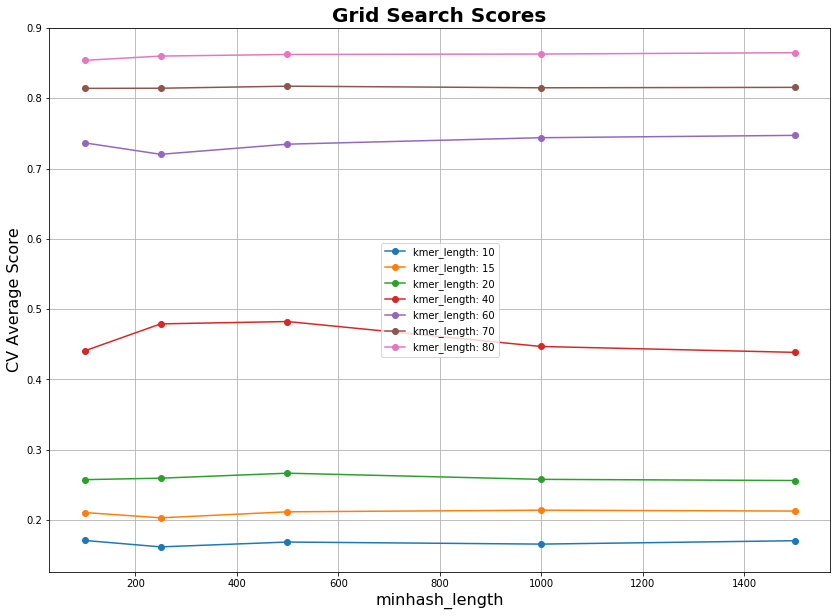

In [49]:
plot_grid_search(grid_search.cv_results_, parameters['minhash_length'], 
                 parameters['kmer_length'], 'minhash_length','kmer_length')

### Test - Unbalanced Categories (ACF take 2) * Category based Inverse Document Frequency
**IFD**
 * Categories are documents 
 * IDf = log(C / c) where C = Total # of categories and c = total categories for a given minhash 

**Unbalanced Categories (ACF take 2)**
 * Each minhash category association is no longer worth 1 point
 * Each minhash category association is worth 1 - (Cat Count / Sum(All Category Counts))
 * Unbalanced categories are penalized the larger they become based on the percentage of all 
 * ACF = 1 - (Cat Count / Sum(All Category Counts))

**Finally ACF-CIDF:**
 * ACF-CIDF = acf * cidf
 * ACF = 1 - (Cat Count / Sum(All Category Counts)) 
 * CIDF = log(Total # of Categories / total categories for a given minhash word)

In [50]:
import numpy as np
from sys import maxsize
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted, check_random_state
from sklearn.utils.multiclass import unique_labels

class StrandClassifierV2(BaseEstimator, ClassifierMixin):
    """
    Parameters
    ----------
    X_ : ndarray, shape (n_samples, n_features)
         The input passed during :meth:`fit`.
    y_ : ndarray, shape (n_samples,)
         The labels passed during :meth:`fit`.
    classes_ : ndarray, shape (n_classes,)
              The classes seen at :meth:`fit`.
    kmer_length : integer, breaking the gene sequence into chunks of this length  
    minhash_length: integer, the number of minhash values to be included in the minhash signature. 
                    Longer minhash signatures approximate Jaccard Similarity more accurately and take 
                    more time to create. The total number of randomly seeded hashing functions is 
                    also controlled by the value in minhash_length.
    minhash_store_ : dict() array, shape (minhash_length), key == minhash int, value = category array int
                      Partitions unique minhash values and category associations by hash function.
    """
    def __init__(self, kmer_length=20, minhash_length=100, random_state=None):
        self.kmer_length = kmer_length
        self.random_state = random_state
        self.minhash_length = minhash_length
        
    def fit(self, X, y):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The training input samples.
        y : array-like, shape (n_samples,)
            The target values. An array of int.
        Returns
        -------
        self : object
            Returns self.
        """
        self.random_state_ = check_random_state(self.random_state)
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y, ensure_2d=False, dtype=None)
        
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        
        # Store the training data (X) and targets (y) used to fit the model
        self.X_ = X
        self.y_ = y
        
        # Store the minhash values and respective categories
        # Count Minhashes per category & Total minhashes 
        self.minhash_store_ = dict()
        
        # Train the model for X and y
        for sequence, category in zip(X, y):   
            # Create minhash signatures for each sequence
            signature = self.create_minhash_signature(sequence)
            # Store minhash values and respective categories to minhash_store_ partitioned by hash function 
            self.add_signature_to_minhash_store(category, signature)
        
        # Add up our category training totals and grand total
        cat_totals = dict()

        for categories in self.minhash_store_.values():
            for category in categories:
                cat_subtotal = cat_totals.get(category, None)
                if cat_subtotal == None:
                    cat_totals[category] = 1
                else:
                    cat_totals[category] += 1

        self.cat_totals_ = cat_totals
        self.cat_grand_total_ = sum(cat_totals.values())
    
        # Return the classifier
        return self

    def predict(self, X):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        y : ndarray, shape (n_samples,)
            The label for each sample is the label of the closest sample
            seen during fit.
        """
        # Check is fit had been called
        check_is_fitted(self, ['X_', 'y_'])

        # Input validation
        X = check_array(X, ensure_2d=False, dtype=None)
        
        yhats = []
        for sequence in X:
            # Create a minhash signature from the sequence X
            signature = self.create_minhash_signature(sequence)
            # Score all categories using the minhash signature  
            category_scores = self.get_category_scores(signature)
            #Get the first category with the highest score
            winning_category = max(category_scores, key=category_scores.get)
            #Add to our predictions
            yhats.append(winning_category)
        
        return yhats
    
    def kmer_generator(self, sequence='', kmer_length=0):
        kmer_count = len(sequence) - (kmer_length - 1)
        for i in range(0, kmer_count):
            yield sequence[i:i + kmer_length]
    
    def create_minhash_signature(self, sequence):
        """
        Parameters
        ----------
        sequence : string, A gene sequence or other string data to be broken into kmers.
        ----------
        signature : array of int, shape (minhash_length), minimum hash value produced by each hash function
                    after hashing all kmers generated from sequence.
        """
        #Break sequence into hashed kmers, then sort
        kmer_hashes = [hash(kmer) for kmer in self.kmer_generator(sequence,self.kmer_length)]
        kmer_hashes.sort()
        #Take the first minhash_length hashes to create the signature 
        signature = kmer_hashes[:self.minhash_length]
        return signature
    
    def add_signature_to_minhash_store(self, category, minhash_signature):
        '''
        Parameters
        ----------
        category : int or string, the category value associated with this minhash_signature
        minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence. 
        '''
        # Add each minhash value and category to the minhash store
        for minhash_value in minhash_signature:
            # Do we already have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories == None:
                # No, so create a new category set for this minhash value
                self.minhash_store_[minhash_value] = {category}
            else: 
                #Yes, add the category to the minhash value's category set
                minhash_categories.add(category)
        return 
    
    '''
    Parameters
    ----------
    minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence.
    Returns
    ----------
    class_scores : dict, shape (minhash_length), key = category, value = category score int
                   The count of categories associated with each hash function's minhash value. 
    '''
    def get_category_scores(self, minhash_signature):
        # Create a dictionary of category / class scores
        class_scores = dict.fromkeys(self.classes_ , 0)
        # lookup minhash values in minhash stores 
        for minhash_value in minhash_signature:
            # Do we have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories != None:
                # Yes, add 1 for each category in the set  
                for category in minhash_categories:
                    # Calculate the category idf for each category
                    cat_idf = np.log(self.cat_grand_total_ / self.cat_totals_[category])
                    # Calculate the category length adjusted frequency
                    acf = 1 - (self.cat_totals_[category] / self.cat_grand_total_)
                    # Calcualte acf_cidf
                    acf_cidf = acf * cat_idf
                    #Add the category ifd to each category's class total
                    class_scores[category] += acf_cidf
        return class_scores

In [51]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# create cross validation iterator
cv = StratifiedKFold(n_splits=10, random_state=42)

strand = StrandClassifierV2(random_state=42)

parameters = { 'kmer_length':[10,15,20,40,60,70,80]
              ,'minhash_length': [100,250,500,1000,1500]
             }

grid_search = GridSearchCV(estimator=strand
                   , n_jobs=-1 # jobs to run in parallel
                   , verbose=1 # low verbosity in output messages
                   , param_grid=parameters
                   , cv=cv
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
grid_search.fit(X, y)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed: 15.0min finished


Wall time: 15min 2s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=StrandClassifierV2(kmer_length=20, minhash_length=100,
                                          random_state=42),
             iid='warn', n_jobs=-1,
             param_grid={'kmer_length': [10, 15, 20, 40, 60, 70, 80],
                         'minhash_length': [100, 250, 500, 1000, 1500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [52]:
grid_search.best_estimator_

StrandClassifierV2(kmer_length=80, minhash_length=100, random_state=42)

In [53]:
print('Highest CV Mean Accuracy')
max(grid_search.cv_results_['mean_test_score'])

Highest CV Mean Accuracy


0.9945674885081488

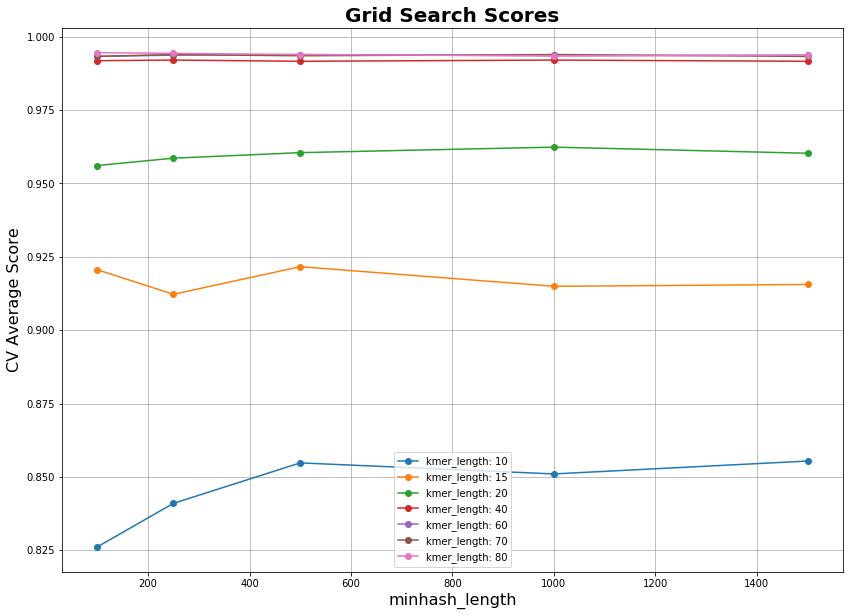

In [54]:
plot_grid_search(grid_search.cv_results_, parameters['minhash_length'], 
                 parameters['kmer_length'], 'minhash_length','kmer_length')

### Test - Minhash Signature Categories
* After training, sort each category.  
* Select minhash signatures of the same length as minhash_length from each category during / after training.
* Categories are all of equal length and this simplifies the scoring formula dramatically. 

In [28]:
import numpy as np
from sys import maxsize
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted, check_random_state
from sklearn.utils.multiclass import unique_labels

class StrandClassifierV2(BaseEstimator, ClassifierMixin):
    """
    Parameters
    ----------
    X_ : ndarray, shape (n_samples, n_features)
         The input passed during :meth:`fit`.
    y_ : ndarray, shape (n_samples,)
         The labels passed during :meth:`fit`.
    classes_ : ndarray, shape (n_classes,)
              The classes seen at :meth:`fit`.
    kmer_length : integer, breaking the gene sequence into chunks of this length  
    minhash_length: integer, the number of minhash values to be included in the minhash signature. 
                    Longer minhash signatures approximate Jaccard Similarity more accurately and take 
                    more time to create. The total number of randomly seeded hashing functions is 
                    also controlled by the value in minhash_length.
    minhash_store_ : dict() array, shape (minhash_length), key == minhash int, value = category array int
                      Partitions unique minhash values and category associations by hash function.
    """
    def __init__(self, kmer_length=20, minhash_length=100, random_state=None):
        self.kmer_length = kmer_length
        self.random_state = random_state
        self.minhash_length = minhash_length
        self.minhash_store_ = None
        
    def fit(self, X, y):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The training input samples.
        y : array-like, shape (n_samples,)
            The target values. An array of int.
        Returns
        -------
        self : object
            Returns self.
        """
        self.random_state_ = check_random_state(self.random_state)
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y, ensure_2d=False, dtype=None)
        
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        
        # Store the training data (X) and targets (y) used to fit the model
        self.X_ = X
        self.y_ = y
        
        # Store the minhash values and respective categories
        self.minhash_store_ = dict()
        
        # Train the model for X and y
        for sequence, category in zip(X, y):   
            # Create minhash signatures for each sequence
            signature = self.create_minhash_signature(sequence)
            # Store minhash signatures by respective categories in minhash_store_ 
            self.add_signature_to_minhash_store(category, signature)
        
        #Traverse the minhash_store_
        for category, signature in self.minhash_store_.items():
            # Get rid of any duplicates from training on multiple sequences
            signature = list(set(signature))
            # Sort the signature in place
            signature.sort()
            # Select the minimum hash values for the category signature
            self.minhash_store_[category] = set(signature[:self.minhash_length])
        
        # Return the classifier
        return self

    def predict(self, X):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        y : ndarray, shape (n_samples,)
            The label for each sample is the label of the closest sample
            seen during fit.
        """
        # Check is fit had been called
        check_is_fitted(self, ['X_', 'y_'])

        # Input validation
        X = check_array(X, ensure_2d=False, dtype=None)
        
        yhats = []
        self.winning_scores_ = []
        self.scores_sums_ = []
        
        for sequence in X:
            # Create a minhash signature from the sequence X
            signature = self.create_minhash_signature(sequence)
            # Score all categories using the minhash signature  
            category_scores = self.get_category_scores(signature)
            #Get the first category with the highest score
            winning_category = max(category_scores, key=category_scores.get)
            #Add to our predictions
            yhats.append(winning_category)
            #get the the number of votes for the winning category
            self.winning_scores_.append(max(category_scores.values()))
            #get the the number of votes for the winning category
            self.scores_sums_.append(sum(category_scores.values()))
            
        
        return yhats
    
    def kmer_generator(self, sequence='', kmer_length=0):
        kmer_count = len(sequence) - (kmer_length - 1)
        for i in range(0, kmer_count):
            yield sequence[i:i + kmer_length]
    
    def create_minhash_signature(self, sequence):
        """
        Parameters
        ----------
        sequence : string, A gene sequence or other string data to be broken into kmers.
        ----------
        signature : array of int, shape (minhash_length), minimum hash value produced by each hash function
                    after hashing all kmers generated from sequence.
        """
        #Break sequence into hashed kmers, then sort
        kmer_hashes = list(set([hash(kmer) for kmer in self.kmer_generator(sequence,self.kmer_length)]))
        kmer_hashes.sort()
        #Take the first minhash_length hashes to create the signature 
        signature = kmer_hashes[:self.minhash_length]
        return signature
    
    def add_signature_to_minhash_store(self, category, minhash_signature):
        '''
        Parameters
        ----------
        category : int or string, the category value associated with this minhash_signature
        minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence. 
        '''
        if category in self.minhash_store_.keys():
           self.minhash_store_[category] += minhash_signature
        else:
           self.minhash_store_[category] = minhash_signature 
        return
    
    '''
    Parameters
    ----------
    minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence.
    Returns
    ----------
    class_scores : dict, shape (minhash_length), key = category, value = category score int
                   The count of categories associated with each hash function's minhash value. 
    '''
    def get_category_scores(self, minhash_signature):
        # Convert the minhash signature to a set
        minhash_signature = set(minhash_signature)
        class_scores = dict()
        # Get the signature for each class in the minhash_store_
        for category, category_signature in self.minhash_store_.items():
            match_count = len(minhash_signature.intersection(category_signature))
            class_scores[category] = match_count
        return class_scores

In [57]:
df = pd.DataFrame(y, columns=['y'])
len(df.y.value_counts())

64

In [53]:
strand = StrandClassifierV2(kmer_length=80, minhash_length=1500, random_state=42)
strand.fit(X,y)

StrandClassifierV2(kmer_length=80, minhash_length=1500, random_state=42)

In [56]:
len(strand.minhash_store_.keys())

64

In [55]:
for k, v in strand.minhash_store_.items():
    print(k,": ",len(v))

g__Paenibacillus :  1500
g__Propionibacterineae :  1500
g__Coriobacterineae :  1500
g__Acinetobacter :  1500
g__Corynebacterineae :  1500
g__Marinobacter :  1500
g__Micrococcineae :  1500
g__Pseudomonas :  1500
g__Micromonosporineae :  1500
g__Clostridium_sensu_stricto :  1500
g__Streptomycineae :  1500
g__Mycoplasma :  1500
g__Flavobacterium :  1500
g__Streptosporangineae :  1500
g__Desulfovibrio :  1500
g__Lysobacter :  1500
g__Helicobacter :  1500
g__Halomonas :  1500
g__Burkholderia :  1500
g__Lactobacillus :  1500
g__Prevotella :  1500
g__Bacillus :  1500
g__Spiroplasma :  1500
g__Streptococcus :  1500
g__Pseudonocardineae :  1500
g__Xenorhabdus :  1500
g__Desulfotomaculum :  1500
g__Chthonomonas/Armatimonadetes_gp3 :  1500
g__Alicyclobacillus :  1500
g__Clostridium_XlVa :  1500
g__Staphylococcus :  1500
g__Paracoccus :  1500
g__Legionella :  1500
g__Pseudoalteromonas :  1500
g__Shewanella :  1500
g__Sphingomonas :  1500
g__Treponema :  1500
g__Halorubrum :  1500
g__Brevundimonas 

In [41]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# create cross validation iterator
cv = StratifiedKFold(n_splits=10, random_state=42)

strand = StrandClassifierV2(random_state=42)

parameters = { 'kmer_length':[10,15,20,40,60,70,80]
              ,'minhash_length': [100,250,500,1000,1500]
             }

grid_search = GridSearchCV(estimator=strand
                   , n_jobs=-1 # jobs to run in parallel
                   , verbose=1 # low verbosity in output messages
                   , param_grid=parameters
                   , cv=cv
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
grid_search.fit(X, y)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  7.5min finished
C:\Users\Jake\Anaconda3\envs\ML7331\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 7min 34s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=StrandClassifierV2(kmer_length=20, minhash_length=100,
                                          random_state=42),
             iid='warn', n_jobs=-1,
             param_grid={'kmer_length': [10, 15, 20, 40, 60, 70, 80],
                         'minhash_length': [100, 250, 500, 1000, 1500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [42]:
grid_search.best_estimator_

StrandClassifierV2(kmer_length=80, minhash_length=1500, random_state=42)

In [43]:
print('Highest CV Mean Accuracy')
max(grid_search.cv_results_['mean_test_score'])

Highest CV Mean Accuracy


0.908692018386962

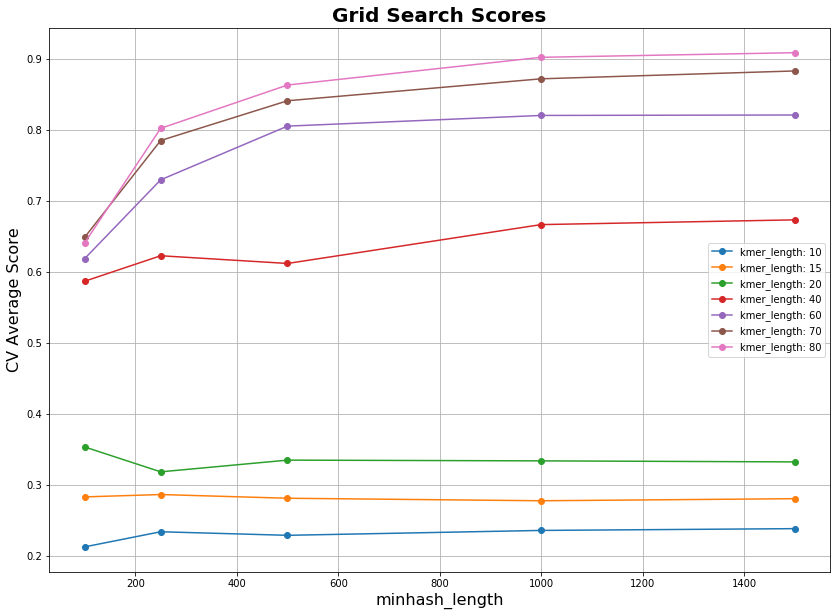

In [44]:
plot_grid_search(grid_search.cv_results_, parameters['minhash_length'], 
                 parameters['kmer_length'], 'minhash_length','kmer_length')

In [45]:
data = {'params': grid_search.cv_results_['params'], 'mean_test_score': grid_search.cv_results_['mean_test_score'] }
df = pd.DataFrame(data)
df.sort_values(['mean_test_score'],ascending=False)

,params,mean_test_score
34,"{'kmer_length': 80, 'minhash_length': 1500}",0.908692
33,"{'kmer_length': 80, 'minhash_length': 1000}",0.902215
29,"{'kmer_length': 70, 'minhash_length': 1500}",0.882992
28,"{'kmer_length': 70, 'minhash_length': 1000}",0.871918
32,"{'kmer_length': 80, 'minhash_length': 500}",0.863142
27,"{'kmer_length': 70, 'minhash_length': 500}",0.840995
24,"{'kmer_length': 60, 'minhash_length': 1500}",0.820936
23,"{'kmer_length': 60, 'minhash_length': 1000}",0.820309
22,"{'kmer_length': 60, 'minhash_length': 500}",0.805265
31,"{'kmer_length': 80, 'minhash_length': 250}",0.802131


# Baseline Tests using all Kmers
* The following tests act as a RDP File baseline and use all kmers during .fit() and .predict()
* Baseline tests are not possbile for larger sequence files
# ------------------------------------------------------------------------------------ 

## Test - Train and Predict using all kmers 
* The minhash_length parameter is ignored in this test!!!
* This should give the highest possbile Jaccard similarity you can achieve on this file 
* The minhash signature uses all kmers in the sequence.
* I still hash the kmers to save space. 
* This test is only possible on smaller files and will run out of memory quickly. 

In [53]:
import numpy as np
from sys import maxsize
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted, check_random_state
from sklearn.utils.multiclass import unique_labels

class StrandClassifierV2(BaseEstimator, ClassifierMixin):
    """
    Parameters
    ----------
    X_ : ndarray, shape (n_samples, n_features)
         The input passed during :meth:`fit`.
    y_ : ndarray, shape (n_samples,)
         The labels passed during :meth:`fit`.
    classes_ : ndarray, shape (n_classes,)
              The classes seen at :meth:`fit`.
    kmer_length : integer, breaking the gene sequence into chunks of this length  
    minhash_length: integer, the number of minhash values to be included in the minhash signature. 
                    Longer minhash signatures approximate Jaccard Similarity more accurately and take 
                    more time to create. The total number of randomly seeded hashing functions is 
                    also controlled by the value in minhash_length.
    minhash_store_ : dict() array, shape (minhash_length), key == minhash int, value = category array int
                      Partitions unique minhash values and category associations by hash function.
    """
    def __init__(self, kmer_length=20, minhash_length=100, random_state=None):
        self.kmer_length = kmer_length
        self.random_state = random_state
        self.minhash_length = minhash_length
        
    def fit(self, X, y):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The training input samples.
        y : array-like, shape (n_samples,)
            The target values. An array of int.
        Returns
        -------
        self : object
            Returns self.
        """
        self.random_state_ = check_random_state(self.random_state)
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y, ensure_2d=False, dtype=None)
        
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        
        # Store the training data (X) and targets (y) used to fit the model
        self.X_ = X
        self.y_ = y
        
        # Store the minhash values and respective categories
        self.minhash_store_ = dict()
        
        # Train the model for X and y
        for sequence, category in zip(X, y):   
            # Create minhash signatures for each sequence
            signature = self.create_minhash_signature(sequence)
            # Store minhash values and respective categories to minhash_store_ partitioned by hash function 
            self.add_signature_to_minhash_store(category, signature)
            
        # Return the classifier
        return self

    def predict(self, X):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        y : ndarray, shape (n_samples,)
            The label for each sample is the label of the closest sample
            seen during fit.
        """
        # Check is fit had been called
        check_is_fitted(self, ['X_', 'y_'])

        # Input validation
        X = check_array(X, ensure_2d=False, dtype=None)
        
        yhats = []
        self.winning_scores_ = []
        self.scores_sums_ = []
        
        for sequence in X:
            # Create a minhash signature from the sequence X
            signature = self.create_minhash_signature(sequence)
            # Score all categories using the minhash signature  
            category_scores = self.get_category_scores(signature)
            #Get the first category with the highest score
            winning_category = max(category_scores, key=category_scores.get)
            #Add to our predictions
            yhats.append(winning_category)
            #get the the number of votes for the winning category
            self.winning_scores_.append(max(category_scores.values()))
            #get the the number of votes for the winning category
            self.scores_sums_.append(sum(category_scores.values()))
            
        
        return yhats
    
    def kmer_generator(self, sequence='', kmer_length=0):
        kmer_count = len(sequence) - (kmer_length - 1)
        for i in range(0, kmer_count):
            yield sequence[i:i + kmer_length]
    
    def create_minhash_signature(self, sequence, minhash_length=None):
        """
        Parameters
        ----------
        sequence : string, A gene sequence or other string data to be broken into kmers.
        ----------
        signature : array of int, shape (minhash_length), minimum hash value produced by each hash function
                    after hashing all kmers generated from sequence.
        """
        #Break sequence into hashed kmers, then sort
        kmer_hashes = [hash(kmer) for kmer in self.kmer_generator(sequence,self.kmer_length)]
        kmer_hashes.sort()
        
        if minhash_length==None:
            #Return all of the kmer_hashes as the signature 
            signature = kmer_hashes
        else:
            #Take the first minhash_length hashes to create the signature 
            signature = kmer_hashes[:minhash_length]
            
        return signature
    
    def add_signature_to_minhash_store(self, category, minhash_signature):
        '''
        Parameters
        ----------
        category : int or string, the category value associated with this minhash_signature
        minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence. 
        '''
        # Add each minhash value and category to the minhash store
        for minhash_value in minhash_signature:
            # Do we already have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories == None:
                # No, so create a new category set for this minhash value
                self.minhash_store_[minhash_value] = {category}
            else: 
                #Yes, add the category to the minhash value's category set
                minhash_categories.add(category)
        return 
    
    '''
    Parameters
    ----------
    minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence.
    Returns
    ----------
    class_scores : dict, shape (minhash_length), key = category, value = category score int
                   The count of categories associated with each hash function's minhash value. 
    '''
    def get_category_scores(self, minhash_signature):
        # Create a dictionary of category / class scores
        class_scores = dict.fromkeys(self.classes_ , 0)
        # lookup minhash values in minhash stores 
        for minhash_value in minhash_signature:
            # Do we have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories != None:
                # Yes, add 1 for each category in the set  
                for category in minhash_categories:
                    class_scores[category] += 1
        return class_scores

In [54]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# create cross validation iterator
cv = StratifiedKFold(n_splits=10, random_state=42)

strand = StrandClassifierV2(random_state=42)

parameters = { 'kmer_length':[10,15,20,25,30,35,40,50,60,70,80]
              ,'minhash_length': [999999999]
             }

grid_search = GridSearchCV(estimator=strand
                   , n_jobs=-1 # jobs to run in parallel
                   , verbose=1 # low verbosity in output messages
                   , param_grid=parameters
                   , cv=cv
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
grid_search.fit(X, y)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:  4.2min finished


Wall time: 4min 20s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=StrandClassifierV2(kmer_length=20, minhash_length=100,
                                          random_state=42),
             iid='warn', n_jobs=-1,
             param_grid={'kmer_length': [10, 15, 20, 25, 30, 35, 40, 50, 60, 70,
                                         80],
                         'minhash_length': [999999999]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [55]:
grid_search.best_estimator_

StrandClassifierV2(kmer_length=20, minhash_length=999999999, random_state=42)

In [56]:
print('Highest CV Mean Accuracy')
max(grid_search.cv_results_['mean_test_score'])

Highest CV Mean Accuracy


0.9960300877559549

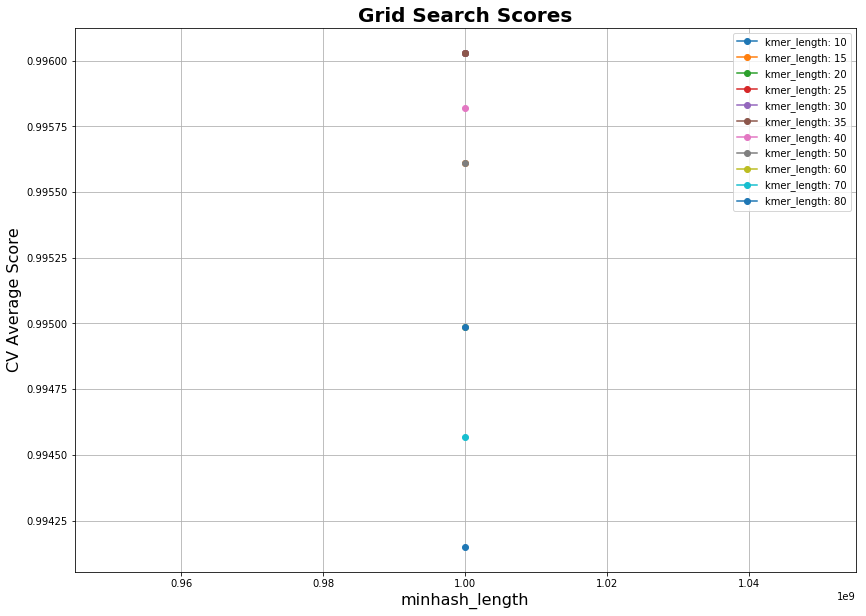

In [57]:
plot_grid_search(grid_search.cv_results_, parameters['minhash_length'], 
                 parameters['kmer_length'], 'minhash_length','kmer_length')

In [58]:
data = {'params': grid_search.cv_results_['params'], 'mean_test_score': grid_search.cv_results_['mean_test_score'] }
df = pd.DataFrame(data)
df.sort_values(['mean_test_score'],ascending=False)

,params,mean_test_score
2,"{'kmer_length': 20, 'minhash_length': 999999999}",0.996030
3,"{'kmer_length': 25, 'minhash_length': 999999999}",0.996030
4,"{'kmer_length': 30, 'minhash_length': 999999999}",0.996030
5,"{'kmer_length': 35, 'minhash_length': 999999999}",0.996030
6,"{'kmer_length': 40, 'minhash_length': 999999999}",0.995821
1,"{'kmer_length': 15, 'minhash_length': 999999999}",0.995612
7,"{'kmer_length': 50, 'minhash_length': 999999999}",0.995612
8,"{'kmer_length': 60, 'minhash_length': 999999999}",0.994985
10,"{'kmer_length': 80, 'minhash_length': 999999999}",0.994985
9,"{'kmer_length': 70, 'minhash_length': 999999999}",0.994567


## Test - Train and Predict using all kmers, Penalize unbalanced categories and multiple category associations

* The minhash_length parameter is ignored in this test!!!
* This should give the highest possbile Jaccard similarity you can achieve on this file 
* The minhash signature uses all kmers in the sequence.
* I still hash the kmers to save space. 
* This test is only possible on smaller files and will run out of memory quickly.

### Unbalanced Categories
* Each minhash category association is no longer worth 1 point
* Each minhash category association is worth 1 - (Cat Count / Sum(All Category Counts))
* Unbalanced categories are penalized the larger they become based on the percentage of all 

### Multiple Category Associations
* When the minhash is associated with more than 1 category, 
* During predictions, divide the category's point value equally across each associated category

In [43]:
import numpy as np
from sys import maxsize
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted, check_random_state
from sklearn.utils.multiclass import unique_labels

class StrandClassifierV2(BaseEstimator, ClassifierMixin):
    """
    Parameters
    ----------
    X_ : ndarray, shape (n_samples, n_features)
         The input passed during :meth:`fit`.
    y_ : ndarray, shape (n_samples,)
         The labels passed during :meth:`fit`.
    classes_ : ndarray, shape (n_classes,)
              The classes seen at :meth:`fit`.
    kmer_length : integer, breaking the gene sequence into chunks of this length  
    minhash_length: integer, the number of minhash values to be included in the minhash signature. 
                    Longer minhash signatures approximate Jaccard Similarity more accurately and take 
                    more time to create. The total number of randomly seeded hashing functions is 
                    also controlled by the value in minhash_length.
    minhash_store_ : dict() array, shape (minhash_length), key == minhash int, value = category array int
                      Partitions unique minhash values and category associations by hash function.
    """
    def __init__(self, kmer_length=20, minhash_length=100, random_state=None):
        self.kmer_length = kmer_length
        self.random_state = random_state
        self.minhash_length = minhash_length
        
    def fit(self, X, y):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The training input samples.
        y : array-like, shape (n_samples,)
            The target values. An array of int.
        Returns
        -------
        self : object
            Returns self.
        """
        self.random_state_ = check_random_state(self.random_state)
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y, ensure_2d=False, dtype=None)
        
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        
        # Store the training data (X) and targets (y) used to fit the model
        self.X_ = X
        self.y_ = y
        
        # Store the minhash values and respective categories
        self.minhash_store_ = dict()
        
        # Train the model for X and y
        for sequence, category in zip(X, y):   
            # Create minhash signatures for each sequence
            signature = self.create_minhash_signature(sequence)
            # Store minhash values and respective categories to minhash_store_ partitioned by hash function 
            self.add_signature_to_minhash_store(category, signature)
        
        # Add up our category training totals and grand total
        cat_totals = dict()

        for categories in self.minhash_store_.values():
            for category in categories:
                cat_subtotal = cat_totals.get(category, None)
                if cat_subtotal == None:
                    cat_totals[category] = 1
                else:
                    cat_totals[category] += 1

        self.cat_totals_ = cat_totals
        self.cat_grand_total_ = sum(cat_totals.values())
        
        #weight each category using the formula for IDF 
        for category, cat_tot in self.cat_totals_.items():
            cat_tot = 1 - (cat_tot / self.cat_grand_total_)
            self.cat_totals_[category] = cat_tot

        # Return the classifier
        return self

    def predict(self, X):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        y : ndarray, shape (n_samples,)
            The label for each sample is the label of the closest sample
            seen during fit.
        """
        # Check is fit had been called
        check_is_fitted(self, ['X_', 'y_'])

        # Input validation
        X = check_array(X, ensure_2d=False, dtype=None)
        
        yhats = []
        for sequence in X:
            # Create a minhash signature from the sequence X
            signature = self.create_minhash_signature(sequence)
            # Score all categories using the minhash signature  
            category_scores = self.get_category_scores(signature)
            #Get the first category with the highest score
            winning_category = max(category_scores, key=category_scores.get)
            #Add to our predictions
            yhats.append(winning_category)
        
        return yhats
    
    def kmer_generator(self, sequence='', kmer_length=0):
        kmer_count = len(sequence) - (kmer_length - 1)
        for i in range(0, kmer_count):
            yield sequence[i:i + kmer_length]
    
    def create_minhash_signature(self, sequence, minhash_length=None):
        """
        Parameters
        ----------
        sequence : string, A gene sequence or other string data to be broken into kmers.
        ----------
        signature : array of int, shape (minhash_length), minimum hash value produced by each hash function
                    after hashing all kmers generated from sequence.
        """
        #Break sequence into hashed kmers, then sort
        kmer_hashes = [hash(kmer) for kmer in self.kmer_generator(sequence,self.kmer_length)]
        kmer_hashes.sort()
        
        if minhash_length==None:
            #Return all of the kmer_hashes as the signature 
            signature = kmer_hashes
        else:
            #Take the first minhash_length hashes to create the signature 
            signature = kmer_hashes[:minhash_length]
            
        return signature
    
    def add_signature_to_minhash_store(self, category, minhash_signature):
        '''
        Parameters
        ----------
        category : int or string, the category value associated with this minhash_signature
        minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence. 
        '''
        # Add each minhash value and category to the minhash store
        for minhash_value in minhash_signature:
            # Do we already have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories == None:
                # No, so create a new category set for this minhash value
                self.minhash_store_[minhash_value] = {category}
            else: 
                #Yes, add the category to the minhash value's category set
                minhash_categories.add(category)
        return 
    
    '''
    Parameters
    ----------
    minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence.
    Returns
    ----------
    class_scores : dict, shape (minhash_length), key = category, value = category score int
                   The count of categories associated with each hash function's minhash value. 
    '''
    def get_category_scores(self, minhash_signature):
        # Create a dictionary of category / class scores
        class_scores = dict.fromkeys(self.classes_ , 0)
        # lookup minhash values in minhash stores 
        for minhash_value in minhash_signature:
            # Do we have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories != None:
                # Yes, add 1 for each category in the set  
                for category in minhash_categories:
                    # Get the category's weighted score 
                    cate_weighted_score = self.cat_totals_[category]
                    
                    # Calculate minhash level score value based on how many 
                    #  categories a particular minhash is associated with.
                    score_value = cate_weighted_score / len(minhash_categories)
                    
                    # Lookup the IDF weighted scores
                    class_scores[category] += score_value
        return class_scores

In [44]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# create cross validation iterator
cv = StratifiedKFold(n_splits=10, random_state=42)

strand = StrandClassifierV2(random_state=42)

parameters = { 'kmer_length':[10,15,20,25,30,35,40,50,60,70,80]
              ,'minhash_length': [999999999]
             }

grid_search = GridSearchCV(estimator=strand
                   , n_jobs=-1 # jobs to run in parallel
                   , verbose=1 # low verbosity in output messages
                   , param_grid=parameters
                   , cv=cv
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
grid_search.fit(X, y)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:  5.0min finished


Wall time: 5min 5s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=StrandClassifierV2(kmer_length=20, minhash_length=100,
                                          random_state=42),
             iid='warn', n_jobs=-1,
             param_grid={'kmer_length': [10, 15, 20, 25, 30, 35, 40, 50, 60, 70,
                                         80],
                         'minhash_length': [999999999]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [45]:
grid_search.best_estimator_

StrandClassifierV2(kmer_length=15, minhash_length=999999999, random_state=42)

In [46]:
print('Highest CV Mean Accuracy')
max(grid_search.cv_results_['mean_test_score'])

Highest CV Mean Accuracy


0.9958211450062683

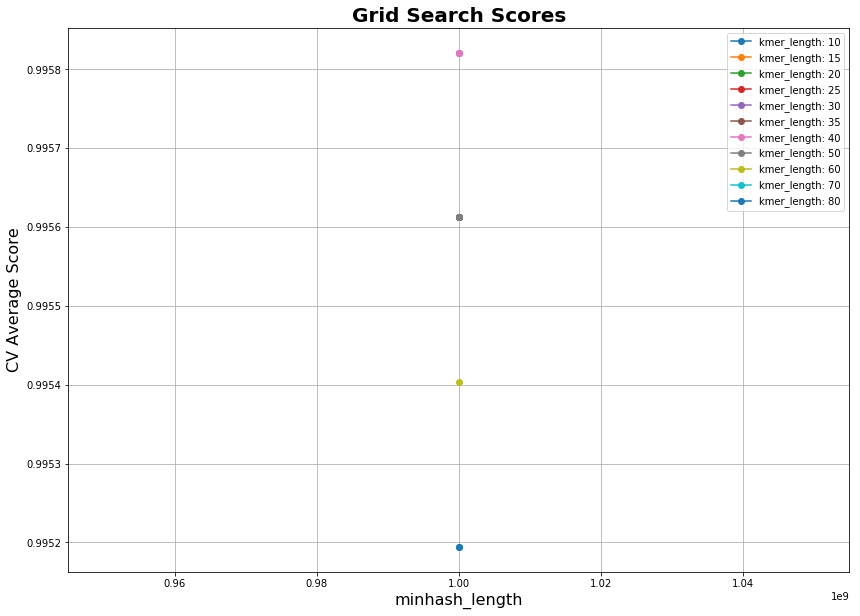

In [47]:
plot_grid_search(grid_search.cv_results_, parameters['minhash_length'], 
                 parameters['kmer_length'], 'minhash_length','kmer_length')

In [52]:
data = {'params': grid_search.cv_results_['params'], 'mean_test_score': grid_search.cv_results_['mean_test_score'] }
df = pd.DataFrame(data)
df.sort_values(['mean_test_score'],ascending=False)

,params,mean_test_score
1,"{'kmer_length': 15, 'minhash_length': 999999999}",0.995821
4,"{'kmer_length': 30, 'minhash_length': 999999999}",0.995821
6,"{'kmer_length': 40, 'minhash_length': 999999999}",0.995821
0,"{'kmer_length': 10, 'minhash_length': 999999999}",0.995612
2,"{'kmer_length': 20, 'minhash_length': 999999999}",0.995612
3,"{'kmer_length': 25, 'minhash_length': 999999999}",0.995612
5,"{'kmer_length': 35, 'minhash_length': 999999999}",0.995612
7,"{'kmer_length': 50, 'minhash_length': 999999999}",0.995612
8,"{'kmer_length': 60, 'minhash_length': 999999999}",0.995403
9,"{'kmer_length': 70, 'minhash_length': 999999999}",0.995194


## Test - Train and Predict using all kmers, Calculate Jaccard similarity between each kmer set and category

* The minhash_length parameter is ignored in this test!!!
* This should give the highest possbile Jaccard similarity you can achieve on this file 
* The minhash signature uses all kmers in the sequence.
* I still hash the kmers to save space. 
* This test is only possible on smaller files and will run out of memory quickly.

### Calculate Jaccard similarity between each kmer set and category
* insection(kmers, category kmers) / union(kmers, category kmers)

In [28]:
import numpy as np
from sys import maxsize
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted, check_random_state
from sklearn.utils.multiclass import unique_labels

class StrandClassifierV2(BaseEstimator, ClassifierMixin):
    """
    Parameters
    ----------
    X_ : ndarray, shape (n_samples, n_features)
         The input passed during :meth:`fit`.
    y_ : ndarray, shape (n_samples,)
         The labels passed during :meth:`fit`.
    classes_ : ndarray, shape (n_classes,)
              The classes seen at :meth:`fit`.
    kmer_length : integer, breaking the gene sequence into chunks of this length  
    minhash_length: integer, the number of minhash values to be included in the minhash signature. 
                    Longer minhash signatures approximate Jaccard Similarity more accurately and take 
                    more time to create. The total number of randomly seeded hashing functions is 
                    also controlled by the value in minhash_length.
    minhash_store_ : dict() array, shape (minhash_length), key == minhash int, value = category array int
                      Partitions unique minhash values and category associations by hash function.
    """
    def __init__(self, kmer_length=20, minhash_length=100, random_state=None):
        self.kmer_length = kmer_length
        self.random_state = random_state
        self.minhash_length = minhash_length
        
    def fit(self, X, y):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The training input samples.
        y : array-like, shape (n_samples,)
            The target values. An array of int.
        Returns
        -------
        self : object
            Returns self.
        """
        self.random_state_ = check_random_state(self.random_state)
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y, ensure_2d=False, dtype=None)
        
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        
        # Store the training data (X) and targets (y) used to fit the model
        self.X_ = X
        self.y_ = y
        
        # Store the minhash values and respective categories
        self.minhash_store_ = dict()
        
        # Train the model for X and y
        for sequence, category in zip(X, y):   
            # Create minhash signatures for each sequence
            signature = self.create_minhash_signature(sequence)
            # Store minhash values and respective categories to minhash_store_ partitioned by hash function 
            self.add_signature_to_minhash_store(category, signature)
        
        # Add up our category training totals and grand total
        cat_totals = dict()

        for categories in self.minhash_store_.values():
            for category in categories:
                cat_subtotal = cat_totals.get(category, None)
                if cat_subtotal == None:
                    cat_totals[category] = 1
                else:
                    cat_totals[category] += 1

        self.cat_totals_ = cat_totals
        self.cat_grand_total_ = sum(cat_totals.values())
        
        #weight each category using the formula for IDF 
        #for category, cat_tot in self.cat_totals_.items():
        #    cat_tot = 1 - (cat_tot / self.cat_grand_total_)
        #    self.cat_totals_[category] = cat_tot

        # Return the classifier
        return self

    def predict(self, X):
        """
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        y : ndarray, shape (n_samples,)
            The label for each sample is the label of the closest sample
            seen during fit.
        """
        # Check is fit had been called
        check_is_fitted(self, ['X_', 'y_'])

        # Input validation
        X = check_array(X, ensure_2d=False, dtype=None)
        
        yhats = []
        for sequence in X:
            # Create a minhash signature from the sequence X
            signature = self.create_minhash_signature(sequence)
            # Score all categories using the minhash signature  
            category_scores = self.get_category_scores(signature)
            #Get the first category with the highest score
            winning_category = max(category_scores, key=category_scores.get)
            #Add to our predictions
            yhats.append(winning_category)
        
        return yhats
    
    def kmer_generator(self, sequence='', kmer_length=0):
        kmer_count = len(sequence) - (kmer_length - 1)
        for i in range(0, kmer_count):
            yield sequence[i:i + kmer_length]
    
    def create_minhash_signature(self, sequence, minhash_length=None):
        """
        Parameters
        ----------
        sequence : string, A gene sequence or other string data to be broken into kmers.
        ----------
        signature : array of int, shape (minhash_length), minimum hash value produced by each hash function
                    after hashing all kmers generated from sequence.
        """
        # Break sequence into a unique set of hashed kmers
        kmer_hashes = list(set(hash(kmer) for kmer in self.kmer_generator(sequence,self.kmer_length)))
        kmer_hashes.sort()
        
        if minhash_length==None:
            #Return all of the kmer_hashes as the signature 
            signature = kmer_hashes
        else:
            #Take the first minhash_length hashes to create the minhash signature 
            signature = kmer_hashes[:minhash_length]
            
        return signature
    
    def add_signature_to_minhash_store(self, category, minhash_signature):
        '''
        Parameters
        ----------
        category : int or string, the category value associated with this minhash_signature
        minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence. 
        '''
        # Add each minhash value and category to the minhash store
        for minhash_value in minhash_signature:
            # Do we already have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories == None:
                # No, so create a new category set for this minhash value
                self.minhash_store_[minhash_value] = {category}
            else: 
                #Yes, add the category to the minhash value's category set
                minhash_categories.add(category)
        return 
    
    '''
    Parameters
    ----------
    minhash_signature : array of int, shape (minhash_length), minimum hash value produced 
                            by each hash function after hashing all kmers generated from sequence.
    Returns
    ----------
    class_scores : dict, shape (minhash_length), key = category, value = category score int
                   The count of categories associated with each hash function's minhash value. 
    '''
    def get_category_scores(self, minhash_signature):
        # Create a dictionary of category / class scores
        class_scores = dict.fromkeys(self.classes_ , 0)
        # lookup minhash values in minhash stores 
        for minhash_value in minhash_signature:
            # Do we have categories for this minhash value? 
            minhash_categories = self.minhash_store_.get(minhash_value, None)
            if minhash_categories != None:
                # Yes, add 1 for each category in the set  
                for category in minhash_categories:
                    # Add 1 for each category score (intersection)
                    class_scores[category] += 1
                
        # Once all category matches have been counted (magnitude of intersection)
        # Divide each category score by the count of unique items between the minash and category (magnitude of union)
        minhash_len = len(minhash_signature)
        for category, cat_minhash_intersect in class_scores.items():
            #How many unique items do we have between this category and this minhash signature (magnitude of union) 
            cat_len = self.cat_totals_[category]
            cat_minhash_union = cat_minhash_intersect +\
                                (cat_len - cat_minhash_intersect) +\
                                (minhash_len - cat_minhash_intersect) 
            #Conver each class score into the minhash / category Jaccard similarity 
            class_scores[category] = cat_minhash_intersect / cat_minhash_union
        return class_scores

In [29]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# create cross validation iterator
cv = StratifiedKFold(n_splits=10, random_state=42)

strand = StrandClassifierV2(random_state=42)

parameters = { 'kmer_length':[10,15,20,25,30,35,40,50,60,70,80]
              ,'minhash_length': [999999999]
             }

grid_search = GridSearchCV(estimator=strand
                   , n_jobs=-1 # jobs to run in parallel
                   , verbose=1 # low verbosity in output messages
                   , param_grid=parameters
                   , cv=cv
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
grid_search.fit(X, y)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:  4.9min finished
C:\Users\Jake\Anaconda3\envs\ML7331\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 5min 3s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=StrandClassifierV2(kmer_length=20, minhash_length=100,
                                          random_state=42),
             iid='warn', n_jobs=-1,
             param_grid={'kmer_length': [10, 15, 20, 25, 30, 35, 40, 50, 60, 70,
                                         80],
                         'minhash_length': [999999999]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [30]:
grid_search.best_estimator_

StrandClassifierV2(kmer_length=80, minhash_length=999999999, random_state=42)

In [31]:
print('Highest CV Mean Accuracy')
max(grid_search.cv_results_['mean_test_score'])

Highest CV Mean Accuracy


0.9398244880902633

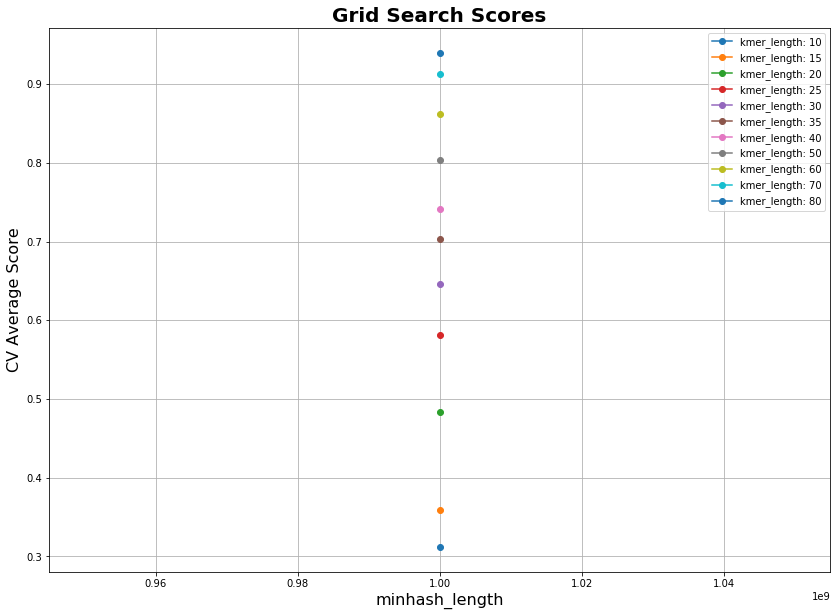

In [32]:
plot_grid_search(grid_search.cv_results_, parameters['minhash_length'], 
                 parameters['kmer_length'], 'minhash_length','kmer_length')

In [33]:
data = {'params': grid_search.cv_results_['params'], 'mean_test_score': grid_search.cv_results_['mean_test_score'] }
df = pd.DataFrame(data)
df.sort_values(['mean_test_score'],ascending=False)

,params,mean_test_score
10,"{'kmer_length': 80, 'minhash_length': 999999999}",0.939824
9,"{'kmer_length': 70, 'minhash_length': 999999999}",0.912871
8,"{'kmer_length': 60, 'minhash_length': 999999999}",0.862098
7,"{'kmer_length': 50, 'minhash_length': 999999999}",0.802967
6,"{'kmer_length': 40, 'minhash_length': 999999999}",0.741329
5,"{'kmer_length': 35, 'minhash_length': 999999999}",0.703510
4,"{'kmer_length': 30, 'minhash_length': 999999999}",0.645424
3,"{'kmer_length': 25, 'minhash_length': 999999999}",0.581697
2,"{'kmer_length': 20, 'minhash_length': 999999999}",0.482867
1,"{'kmer_length': 15, 'minhash_length': 999999999}",0.358964
